In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

qa_pairs =[
        ("What is VIT?", "VIT stands for Vellore Institute of Technology."),
        ("Where is VIT located?", "VIT is located in Vellore, Tamil Nadu, India."),
        ("What are the regulations referred to as in its complete form?",
         "The regulations are called 'FFCS-CAL Academic Regulations Version 3.2' in its complete form."),
        ("What are the regulations referred to as in short form?",
         "In short form, the regulations are called 'FFCS-CAL Regulations 3.2'."),
        ("What academic programs are the regulations applicable to?",
         "The regulations are applicable to students admitted in B.Tech. (2015-2016) and M.Tech. (2016-2017) programs and thereafter to various degree programs."),
        ("Who decides the academic programs under FFCS?",
         "Academic programs under FFCS are decided by the Academic council."),
        ("When was the 'B.Tech. Degree Program Regulations 2008, FFCS Regulations - Version 1.00' originally approved?",
         "The regulations were originally approved by the 18th Academic Council held on 16th July 2009."),
        ("What was the approval date for 'FFCS Regulations Version 1.10'?",
         "'FFCS Regulations Version 1.10' was approved by the 20th Academic Council held on 26th March 2010."),
        ("When was the complete Academic Regulations Version 2.00 approved?",
         "The complete Academic Regulations Version 2.00 was approved by the 27th Academic Council held on 27th July 2012."),
        ("What changes were made on 15th August 2012?",
         "Minor modifications were carried out as per the procedure outlined in Section 21 on 15th August 2012, and the regulations were named as Version 2.10."),
        ("When was 'FFCS Regulations 3.0' approved?",
         "FFCS Regulations 3.0 was approved by the 37th Academic Council meeting held on 16th June 2015."),
        ("When was the modified CAL regulation as given in version 3.1 approved?",
         "The modified CAL regulation as given in version 3.1 was approved by the 46th Academic Council held on 24th August 2017."),
        ("What examinations do students seeking admission to B.Tech. and M.Tech. Programs need to undertake?",
         "Students seeking admission to various B.Tech. and M.Tech. Programs need to undertake national level computer-based competitive examinations - VITEEE and VITMEE, respectively, conducted by the University once a year."),
        ("How are selected students admitted into various programs?",
         "Selected students will be admitted into various programs through counseling."),
        ("How are students admitted to programs other than B.Tech. and M.Tech.?",
         "For all other programs, students will be admitted based on their merit by considering the marks obtained in the qualifying examinations, in addition to satisfying specific admission criteria of the programs as stipulated by the respective national level councils."),
        ("What are the minimum qualifications essential for admission to various programs of the University?",
         "The minimum qualifications essential for admission to various programs of the University will be stipulated and indicated in the Admissions brochure released before the commencement of admission to various programs every year."),
        ("What are the competitive examinations conducted for B.Tech. and M.Tech. Programs?",
         "The competitive examinations conducted for B.Tech. and M.Tech. Programs are VITEEE and VITMEE, respectively."),
        ("How often are the national level competitive examinations conducted by the University?",
         "The national level competitive examinations conducted by the University are held once a year."),
        ("How are the dates of the competitive examinations announced?",
         "The dates of the competitive examinations are announced separately through media/university website."),
        ("What is the mode of the competitive examinations?",
         "The competitive examinations are conducted in a computer-based mode."),
        ("What is the role of the University's counseling process in the admission of students?",
         "The University's counseling process facilitates the admission of selected students into various programs."),
        ("How are admission criteria determined for programs other than B.Tech. and M.Tech.?",
         "Admission criteria for programs other than B.Tech. and M.Tech. are determined based on merit in the qualifying examinations and specific criteria stipulated by national level councils."),
        ("What information is provided in the Admissions brochure released by the University?",
         "The Admissions brochure released by the University provides information on the minimum qualifications essential for admission to various programs."),
        ("When is the Admissions brochure released?",
         "The Admissions brochure is released before the commencement of admission to various programs every year."),
        ("What system is adopted for all programs offered by VIT?",
         "All programs offered by VIT adopt a Semester system, except the MBA program which is offered in trimester mode."),
        ("How many semesters are there in an academic year?", "There are two semesters in an academic year."),
        ("What are the durations of the Fall Semester and Winter Semester?",
         "Normally, the Fall Semester is from July to November, and the Winter Semester is from December to April."),
        ("Are there optional semesters offered during vacation periods?",
         "Yes, optional Intersession and Summer semesters may be offered during the Winter and Summer vacation periods respectively, subject to demand and availability of resources."),
        ("How are Winter session and Summer semesters offered?",
         "Both Winter session and Summer semesters are offered under a fast track mode, maintaining the number of instructional hours equivalent to that in the regular semester with a greater number of instruction hours per week."),
        ("What rules and regulations apply to courses offered during Intersession and Summer semesters?",
         "Unless otherwise specified explicitly, all rules and regulations applicable to a course offered during a regular semester also apply to courses offered during Intersession and Summer semesters."),
        ("How are the maximum number of courses and eligibility criteria specified?",
         "The maximum number of courses to be taken, eligibility criteria to register, and related information are specified through Circulars issued by the University from time to time."),
        ("What additional semesters may be offered based on need and availability of resources?",
         "Additional optional semesters may be offered based on the need and availability of resources."),
        ("What is the purpose of Weekend Intrasemester?","Weekend Intrasemester may be offered to students based on the requirement, during both the regular semesters (Fall and Winter)."),
        ("Is it mandatory for the University to offer intersessions, intrasessions, and summer semesters?","No, it is not binding on the University to offer these semesters or courses during these semesters. They are offered subject to the availability of resources."),
        ("What is VIT?", "VIT stands for Vellore Institute of Technology."),
        ("Where is VIT located?", "VIT is located in Vellore, Tamil Nadu, India."),
        ("What are the regulations referred to as in its complete form?",
         "The regulations are called 'FFCS-CAL Academic Regulations Version 3.2' in its complete form."),
        ("What are the regulations referred to as in short form?",
         "In short form, the regulations are called 'FFCS-CAL Regulations 3.2'."),
        ("What academic programs are the regulations applicable to?",
         "The regulations are applicable to students admitted in B.Tech. (2015-2016) and M.Tech. (2016-2017) programs and thereafter to various degree programs."),
        ("Who decides the academic programs under FFCS?",
         "Academic programs under FFCS are decided by the Academic council."),
        ("When was the 'B.Tech. Degree Program Regulations 2008, FFCS Regulations - Version 1.00' originally approved?",
         "The regulations were originally approved by the 18th Academic Council held on 16th July 2009."),
        ("What was the approval date for 'FFCS Regulations Version 1.10'?",
         "'FFCS Regulations Version 1.10' was approved by the 20th Academic Council held on 26th March 2010."),
        ("When was the complete Academic Regulations Version 2.00 approved?",
         "The complete Academic Regulations Version 2.00 was approved by the 27th Academic Council held on 27th July 2012."),
        ("What changes were made on 15th August 2012?",
         "Minor modifications were carried out as per the procedure outlined in Section 21 on 15th August 2012, and the regulations were named as Version 2.10."),
        ("When was 'FFCS Regulations 3.0' approved?",
         "FFCS Regulations 3.0 was approved by the 37th Academic Council meeting held on 16th June 2015."),
        ("When was the modified CAL regulation as given in version 3.1 approved?",
         "The modified CAL regulation as given in version 3.1 was approved by the 46th Academic Council held on 24th August 2017."),
        ("What examinations do students seeking admission to B.Tech. and M.Tech. Programs need to undertake?",
         "Students seeking admission to various B.Tech. and M.Tech. Programs need to undertake national level computer-based competitive examinations - VITEEE and VITMEE, respectively, conducted by the University once a year."),
        ("How are selected students admitted into various programs?",
         "Selected students will be admitted into various programs through counseling."),
        ("How are students admitted to programs other than B.Tech. and M.Tech.?",
         "For all other programs, students will be admitted based on their merit by considering the marks obtained in the qualifying examinations, in addition to satisfying specific admission criteria of the programs as stipulated by the respective national level councils."),
        ("What are the minimum qualifications essential for admission to various programs of the University?",
         "The minimum qualifications essential for admission to various programs of the University will be stipulated and indicated in the Admissions brochure released before the commencement of admission to various programs every year."),
        ("What are the competitive examinations conducted for B.Tech. and M.Tech. Programs?",
         "The competitive examinations conducted for B.Tech. and M.Tech. Programs are VITEEE and VITMEE, respectively."),
        ("How often are the national level competitive examinations conducted by the University?",
         "The national level competitive examinations conducted by the University are held once a year."),
        ("How are the dates of the competitive examinations announced?",
         "The dates of the competitive examinations are announced separately through media/university website."),
        ("What is the mode of the competitive examinations?",
         "The competitive examinations are conducted in a computer-based mode."),
        ("What is the role of the University's counseling process in the admission of students?",
         "The University's counseling process facilitates the admission of selected students into various programs."),
        ("How are admission criteria determined for programs other than B.Tech. and M.Tech.?",
         "Admission criteria for programs other than B.Tech. and M.Tech. are determined based on merit in the qualifying examinations and specific criteria stipulated by national level councils."),
        ("What information is provided in the Admissions brochure released by the University?",
         "The Admissions brochure released by the University provides information on the minimum qualifications essential for admission to various programs."),
        ("When is the Admissions brochure released?",
         "The Admissions brochure is released before the commencement of admission to various programs every year."),
        ("What system is adopted for all programs offered by VIT?",
         "All programs offered by VIT adopt a Semester system, except the MBA program which is offered in trimester mode."),
        ("How many semesters are there in an academic year?", "There are two semesters in an academic year."),
        ("What are the durations of the Fall Semester and Winter Semester?",
         "Normally, the Fall Semester is from July to November, and the Winter Semester is from December to April."),
        ("Are there optional semesters offered during vacation periods?",
         "Yes, optional Intersession and Summer semesters may be offered during the Winter and Summer vacation periods respectively, subject to demand and availability of resources."),
        ("How are Winter session and Summer semesters offered?",
         "Both Winter session and Summer semesters are offered under a fast track mode, maintaining the number of instructional hours equivalent to that in the regular semester with a greater number of instruction hours per week."),
        ("What rules and regulations apply to courses offered during Intersession and Summer semesters?",
         "Unless otherwise specified explicitly, all rules and regulations applicable to a course offered during a regular semester also apply to courses offered during Intersession and Summer semesters."),
        ("How are the maximum number of courses and eligibility criteria specified?",
         "The maximum number of courses to be taken, eligibility criteria to register, and related information are specified through Circulars issued by the University from time to time."),
        ("What additional semesters may be offered based on need and availability of resources?",
         "Additional optional semesters may be offered based on the need and availability of resources."),
        ("What is the purpose of Weekend Intrasemester?",
         "Weekend Intrasemester may be offered to students based on the requirement, during both the regular semesters (Fall and Winter)."),
        ("Is it mandatory for the University to offer intersessions, intrasessions, and summer semesters?",
         "No, it is not binding on the University to offer these semesters or courses during these semesters. They are offered subject to the availability of resources."),
        ("What is a curriculum in the context of an academic program?","In the context of an academic program, a curriculum is a prescribed list of courses grouped under various categories such as University Core, University Elective, Program Core, and Program Elective."),
        ("What are the different categories under which courses are grouped in a curriculum?",
         "Courses in a curriculum are typically grouped under various heads, including University Core, University Elective, Program Core, and Program Elective."),
        ("How is the completion of a degree program determined?",
         "A student is considered to have completed a degree program only if they have successfully cleared or completed all the necessary courses prescribed in their program curriculum."),
        ("What is the significance of the version number in a program curriculum?",
         "Each program curriculum has a version number tagged to the academic year to which it is applicable. Subsequent changes in the curriculum are indicated by a change in the curriculum version number."),
        ("Who is responsible for overseeing the curriculum of a program?",
         "The Head of the Department (HoD) or Program Chair is responsible for overseeing the curriculum of one or more programs."),
        ("What is the process for recommending changes in the curriculum?",
         "Any change in the curriculum must be recommended by the Board of Studies of the program concerned and submitted to the Academic Council by the Chairperson of the Board of Studies for approval."),
        ("What is a course syllabus?",
         "A course syllabus is a document that explains what a student is going to learn in that course. It includes details such as course code, course title, LTPJC, syllabus revision number, course prerequisites/co-requisites/anti-requisites, course objectives, expected course outcomes, modules with short topics, brief description of the topics, expected duration needed to cover each module, suggested text and reference books, and dates of recommendation and approval by the Board of Studies and the Academic Council."),
        ("What are the components of a course syllabus?",
         "Components of a course syllabus include course code, course title, LTPJC, syllabus revision number, course prerequisites/co-requisites/anti-requisites (if any), course objectives, expected course outcomes, modules with short topics, brief description of the topics, expected duration needed to cover each module, suggested text and reference books, and dates of recommendation and approval by the Board of Studies and the Academic Council."),
        ("What is the significance of the syllabus revision number?",
         "The syllabus revision number indicates the version of the syllabus. Any subsequent modifications to the syllabus approved by the Academic Council will be indicated by a change in the syllabus version number. A major change is indicated by an increment in the integer part, while minor changes are indicated by a change in the decimal part."),
        ("Who is responsible for creating and modifying the syllabus of a course?",
         "A Course Committee consisting of a minimum of three faculty members who have taught or are currently teaching the course is responsible for creating and modifying the syllabus. The School Deans may nominate members or alternate them periodically."),
        ("What is the role of the Course Committee?",
         "The Course Committee is responsible for content creation, modification, recommending course equivalences, and other related processes for the syllabus of a course."),
        ("Can other schools independently alter the syllabus of a course?",
         "No, the School which originally created the syllabus for offering the course is deemed to be its owner. Other schools may offer the course to their students in that form as a service course, but they cannot independently involve in altering the syllabus."),
        ("What is a course plan?",
         "A course plan consists of a list of lectures/experiments carried out in each instructional class/lab by the course teacher during the semester. It includes details such as the mode of delivery, reference material used, and others."),
        ("How many hours should be dedicated to different components for one course credit?",
         "For one course credit, 15 lecture hours for theory, 15 hours for tutorial, a minimum of 30 hours of laboratory work, or 60 hours of project work should be put in, within the regular semester period or in a summer/intersession/intrasession term."),
        ("Should separate course plans be prepared for the theory, laboratory, or project portions of a course?",
         "Yes, separate course plans should be prepared for the theory, laboratory, or project portions of any course if the course has an embedded lab and/or project component. Lab exercises and projects given to students should reflect the syllabus content of the course."),
        ("What is a course flowchart?",
         "A course flowchart describes how various courses under Program Core (PC), Program Elective (PE), and University Core (UC) are connected through prerequisites, if any. It uses standard pictorial representations to indicate the basket it belongs to and is grouped to indicate the level of the course. It also indicates necessary pre-, anti-, co-requisites, and its LTPJC for each course along with its course code."),
        ("How are courses classified in terms of course types?",
         "Courses may be classified as Theory only (TH), Lab only (LO), Project only (PJT), Embedded Theory and Lab (ETL), Embedded Lab and Project (ELP), Embedded Theory and Project (ETP), Embedded Theory, Lab, and Project (ETLP). Additionally, courses such as Seminar, Mini Project/Design Project/Summer Project/Innovation project, Capstone project, Master’s Dissertation/Thesis, Comprehensive exam, Industrial internship, Co-/Extra-Curricular, IIP/TARP/LSM/Engineering Drawing are generally grouped under 'Project type'."),
        ("What is the purpose of introducing a 'J' component in courses?",
         "Under CAL, at least 40% of courses in the curriculum shall have a 'J' component (Project) as part of the course to implement PBL concepts. The introduction of 'J' aims to improve 'learning by doing' and increase the academic engagement of students. For the 'J' component, the student has to take up a project related to the course in consultation with the faculty concerned and complete the project within the semester. The project can be a group project with a maximum of ten members, thus promoting participatory and peer learning. There will be a minimum of three reviews conducted in a semester for the project courses/components, and the marks will be awarded and taken for final assessment."),
        ("Are there any specific requirements for courses offered in the first semester?",
         "Courses offered in the first semester may not have any 'J' component."),
        ("What are the various heads under which courses are grouped in a program curriculum?",
         "Courses in a program curriculum are grouped under various heads, including University Core, University Elective, Program Core, and Program Elective."),
        ("What does the curriculum of a program contain?",
         "The curriculum of a program contains a prescribed list of courses grouped under various heads, as well as details such as course titles, course codes, and syllabus revision numbers."),
        ("How is a student considered to have completed a degree program?",
         "A student is considered to have completed the degree program only if they have successfully cleared/completed all the necessary courses prescribed in their program curriculum."),
        ("What is the significance of the version number in a program curriculum?",
         "Each program curriculum has a version number tagged to the Academic Year to which it is applicable. Subsequent changes in the curriculum are indicated by a change in the curriculum version number."),
        ("Who is responsible for recommending changes in the curriculum?",
         "Changes in the curriculum should be recommended by the Board of Studies of the program concerned and submitted to the Academic Council by the Chairperson of the Board of Studies for approval."),
        ("What elements should be clearly defined while framing a curriculum?",
         "Program Educational Objectives (PEOs), Program Outcomes (POs), Additional Program Outcomes (APOs)/Student Learning Outcomes (SLOs), and Program Specific Outcomes (PSOs) should be clearly defined while framing a curriculum."),
        ("What is the role of a Course Committee in managing a course syllabus?",
         "A Course Committee, consisting of a minimum of three faculty members who have taught the course in the past or are currently teaching it, is responsible for content creation, modification, recommending course equivalences, and other related processes."),
        ("Who is considered responsible for a course syllabus?",
         "The Course Committee is considered responsible for the syllabus, and the School which originally created the syllabus for offering the course is deemed to be its owner."),
        ("What is the purpose of a course plan?",
         "A course plan outlines the list of lectures/experiments to be carried out in each instructional class/lab by the course teacher during the semester, along with details such as mode of delivery, reference material used, and others."),
        ("How are various courses connected through prerequisites represented in a course flowchart?",
         "A course flowchart shows how various courses under Program Core (PC), Program Elective (PE), and University Core (UC) are connected through prerequisites, if any. It indicates necessary pre-, anti-, co-requisites, and its LTPJC for each course along with its course code."),
        ("How is each course identified?", "Each course is identified by a unique Course Code consisting of seven alphanumerals, with three alphabets followed by four digits. The alphabets reflect the discipline/subdiscipline, and the digits indicate the cognitive level and running serial number of the course."),
        ("What does the first numeral in the Course Code represent?", "The first numeral (after the alphabet) in the Course Code indicates the cognitive level of the course as per the course flow chart."),
        ("How are course revisions tracked?", "Each course has its version to track the revisions carried out in its syllabus over time."),
        ("What is the minimum duration required to complete a program?", "The minimum duration required to complete a program is stipulated in accordance with the time period stipulated by national statutory bodies."),
        ("When is a student considered to have completed a program?", "A student is considered to have completed a program only if they complete the minimum courses assigned and earn the required credits as specified by their program curriculum. However, the degree will be awarded only upon completion of the minimum duration of the program."),
        ("Are the general rules and regulations applicable to special programs?", "Yes, the general rules and regulations stipulated in the document are applicable to special programs, including double and dual degrees. However, their specific requirements will be as laid down and approved by the Academic Council separately, from time to time."),
        ("Are students allowed to study additional courses after meeting their minimum credit requirements?", "No, students will not be permitted to study additional courses after they have met their minimum credit requirements."),
        ("What is the maximum duration for completing a program?", "The maximum duration for completing a program is given in Section 19 of the document."),
        ("What is a course credit?", "A course credit is a measurement of the duration that a course is offered as an instruction to students."),
        ("How long is a semester deemed to have?", "A semester is deemed to have 15 instructional (non-exam) weeks."),
        ("How is the duration of a lecture (L) measured in terms of credits?", "A classroom lecture (L) of 50 minutes duration per week, carried out during all weeks of the semester, is considered as one Instructional Unit or one Credit."),
        ("How is the duration of a tutorial (T) measured in terms of credits?", "A tutorial (T) of 50 minutes duration per week, carried out during all weeks of the semester, is considered as one Instructional Unit or one Credit."),
        ("How is the duration of laboratory sessions/practicals/field work/training (P) measured in terms of credits?", "A minimum of 100 minutes per week of laboratory session/practical or field work/training (P) or a combination of these, carried out during all weeks of the semester, is considered as one Instructional Unit or one Credit."),
        ("How is the duration of project activity (J) measured in terms of credits?", "A minimum of 4 hours of project activity (J) per week carried out during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("What does an LTPJC of 2-1-2-4-5 indicate?", "An LTPJC of 2-1-2-4-5 means 2 instructional units based on classroom lecture (L), one instructional unit of tutorial (T), one laboratory (P) based instructional unit (of 100 minutes), one project (J) component (of 200 minutes) - all delivered during a calendar week, and repeated for the entire duration of the semester to earn five credits (C) after passing the course."),
        ("Are there any additional course components mentioned?", "Yes, specialized programs may have course components as directed by their respective council. For example, a law program may incorporate 'moot court' as one of the course components. However, these deviations should be brought for approval by the Academic Council."),
        ("What is the minimum credit requirement for program completion?", "The minimum credit requirement for the completion of a program is clearly specified in the program curriculum."),
        ("What else does a student have to meet besides the minimum credit requirement to become eligible for the degree?", "Besides the minimum credit requirement, the student has to meet the course and credit distribution as specified under section 6.3."),
        ("Is it possible for a student to attain the minimum credits without completing all requisite courses/credits under University Elective (UE)/Program Elective (PE) courses?", "Yes, due to various features of FFCS, it is possible for a student to attain the minimum credits without completing all requisite courses/credits under University Elective (UE)/Program Elective (PE) courses."),
        ("What is mandatory for a student in such circumstances?", "In such circumstances, though the student has attained the total minimum credits, it is mandatory for the student to complete all courses under UC and PC and also to meet the credit requirements under UE and PE to become eligible for the degree."),
        ("What is expected in terms of credit distribution across disciplines?", "It is expected that all programs should accommodate courses from other disciplines, so that students will have multi-disciplinary exposure."),
        ("What skills should be provided sufficient opportunity to enhance?", "All programs should provide sufficient opportunity to students to enhance their communication, soft skills, management, and technical skills."),
        ("Under what categories should the courses fall depending on the program?", "Depending on the program, the courses should fall under engineering, science, humanities, and management categories."),
        ("What is the maximum deviation permitted in credits under each discipline?", "A maximum deviation of 3% in credits is permitted under each discipline."),
        ("What is the purpose of including courses from different disciplines in the curriculum?", "The purpose is to ensure that students have multi-disciplinary exposure."),
        ("What are the different groups into which the curriculum of each program is generally divided?", "The curriculum of each program is generally divided into University Core (UC), Program Core (PC), Program Elective (PE), and University Elective (UE)."),
        ("What are University Core (UC) courses?", "University Core (UC) courses are mandatory to all similar degree programs and are basic in nature, expected to enhance students' fundamental knowledge in various disciplines apart from their own."),
        ("Give an example of a requirement under University Core (UC).", "For example, UC may specify that each student should take a foreign language course(s) for 2 credits, which can be met by taking any course offered from a basket of foreign language courses."),
        ("What are Program Core (PC) courses?", "Program Core (PC) courses are program specific, and students have to complete all the courses listed under PC to become eligible for the degree."),
        ("What is the purpose of Program Elective (PE) courses?", "Program Elective (PE) courses give students an opportunity to study courses which are more advanced or applied or specialized than the basic courses studied as part of program core courses."),
        ("What is the approximate ratio of total credits offered under PE to the number of credits a student should complete under PE according to the CAL program curriculum?", "The total credits offered under PE in the curriculum should be approximately 2.5 times the number of credits a student should complete under PE."),
        ("What role do PE courses play in offering 'Honours' credentials?", "PE courses play a crucial role in offering 'Honours' credentials."),
        ("What happens if a new PE is added to a curriculum of a program?", "If a new PE is added to a curriculum of a program, students adopting the earlier curriculum applicable to their year of joining are also permitted to register the same as their PE, since it ultimately helps them to expand their knowledge."),
        ("What is the desirable ratio of credits between PC and PE courses?", "It is desirable that the ratio of credits between PC and PE courses is in the range of 50:50 to 60:40."),
        ("What is the definition of a course credit?", "A course credit is a measurement of the duration that the course is offered as an 'instruction' to students."),
        ("How is the duration of a course credit determined?", "The duration of a course credit is determined based on the instructional units provided during a semester."),
        ("What are the different types of instructional units considered for calculating course credits?", "The different types of instructional units considered are Lecture (L), Tutorial (T), Practical (P), and Project (J)."),
        ("How is the duration of each instructional unit measured?", "Each instructional unit is measured as 50 minutes per week."),
        ("What is the total duration of a semester?", "A semester is deemed to have 15 instructional (non-exam) weeks."),
        ("How are course credits calculated for Lecture (L) and Tutorial (T) components?", "Each Lecture (L) or Tutorial (T) component conducted for 50 minutes per week during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("How are course credits calculated for Practical (P) components?", "A minimum of 100 minutes per week of laboratory session/practical or field work/training, or a combination of these, carried out during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("How are course credits calculated for Project (J) components?", "A minimum of 4 hours of project activity per week carried out during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("What is the significance of the LTPJC notation for a course?", "The LTPJC notation specifies the number of credits delivered as Lecture (L), Tutorial (T), Practical (P), Project (J), and the total instructional delivery indicated as Credits (C) for the course."),
        ("Can courses have additional components apart from Lecture (L), Tutorial (T), Practical (P), and Project (J)?", "Yes, specialized programs may have additional course components directed by their respective councils, such as 'moot court' for law programs."),
        ("Who approves deviations from the standard credit distribution among different disciplines?", "Deviations from the standard credit distribution among different disciplines should be brought for approval by the Academic Council."),
        ("What is a University Elective (UE)?", "A University Elective (UE) is a course that students can choose from any discipline, subject to eligibility criteria specified under Annexure - II."),
        ("Can a University Elective (UE) be a course that is part of the University Core (UC) or Program Core (PC)?", "No, a University Elective (UE) cannot be a course specified under University Core (UC) or Program Core (PC) in the student's curriculum."),
        ("How are credits for University Electives (UE) calculated?", "The number of credits a student is permitted to take under University Electives (UE) is fixed, and students can fulfill this requirement by taking a combination of smaller course credits."),
        ("Can students take Program Elective (PE) courses listed in their curriculum as University Electives (UE)?", "Yes, students not willing to take courses from other disciplines can take the Program Elective (PE) courses listed in their curriculum as University Electives (UE) to fulfill the credits requirements under UE."),
        ("Are Audit courses eligible to be credited again under the University Elective (UE) option?", "No, an Audit course already cleared by the student cannot be credited again under the University Elective (UE) option."),
        ("Can PG level courses be taken as University Elective (UE) courses by UG program students?", "Yes, PG level courses can be taken as University Elective (UE) courses by UG program students subject to the conditions stipulated under Section 11."),
        ("What is the duration of Industrial Internship and how many credits does it carry?", "Industrial Internship lasts for four weeks and carries 2 credits."),
        ("When should students undergo Industrial Internship?", "Students should undergo Industrial Internship any time after their first year of study."),
        ("How can B.Tech. students avail Industrial Internship training?", "B.Tech. students can avail Industrial Internship training in a single stretch of four weeks (28 days) or in two stretches of two-weeks duration."),
        ("What is the purpose of Industrial Internship?", "The purpose of Industrial Internship is to provide students with exposure to an academic environment different from their future work environment, such as industry, to prepare them for their future careers."),
        ("Who assists students in identifying an industry and getting necessary approval for Industrial Internship?", "Each School identifies a faculty in-charge of Industrial Internship at the program level, who assists the students in identifying an industry and obtaining necessary approval."),
        ("What is expected from students during their Industrial Internship?", "During their Industrial Internship, students are expected to maintain a digital log of their activity and learning."),
        ("What documents are required to be uploaded after completing Industrial Internship?", "At the end of the Industrial Internship, students are required to upload a report along with completion certificate(s) from the Industry where they had received the training into the academic software."),
        ("Who evaluates the Industrial Internship training?", "Schools form 'Industrial Internship evaluation committees' to evaluate the Industrial Internship training, based on entries made in the activity log."),
        ("Can students register for the Industrial Internship course in a subsequent semester for evaluation?", "Yes, students who have completed their training may register for the Industrial Internship course in a subsequent semester for evaluation by the School."),
        ("How many weeks of Industrial Internship are required for B.Tech. students?", "B.Tech. students are required to undergo four weeks of Industrial Internship in a reputed industry in their respective discipline of study."),
        ("Is there flexibility in the duration of Industrial Internship for B.Tech. students?", "Yes, B.Tech. students can choose to complete their Industrial Internship in a single stretch of four weeks (28 days) or in two stretches of two-weeks duration."),
        ("What should students do during their Industrial Internship?", "During their Industrial Internship, students are expected to gain practical experience and learn about the functioning of the industry relevant to their field of study."),
        ("What is the role of the faculty in-charge of Industrial Internship?", "The faculty in-charge of Industrial Internship assists students in selecting suitable industries, obtaining necessary approvals, and provides guidance throughout the internship period."),
        ("What is the purpose of Capstone Project / Master Thesis?", "The purpose of Capstone Project / Master Thesis is for students to carry out an innovative project work during their final semester of study, applying the knowledge gained in their courses/labs, and demonstrating their analytical, design, fabrication ability, and presentation skills."),
        ("Who assigns a faculty member as a guide for the Capstone Project / Master Thesis?", "Each student is assigned a faculty member as a guide within their School for the Capstone Project / Master Thesis."),
        ("Can students opt for a guide outside their School for the Capstone Project / Master Thesis?", "With the permission of HoD/Program Chair, students may opt for a guide outside their School for the Capstone Project / Master Thesis."),
        ("What is the consequence of submitting a project that was bought (purchased/ borrowed/ submitted) from another institution?", "Submitting a project that was bought (purchased/ borrowed/ submitted) from another institution is considered examination malpractice and will result in an 'N' grade. The student must register again and clear the project in a subsequent semester."),
        ("Are group projects permitted at undergraduate level programs?", "Yes, group projects are permitted at undergraduate level programs."),
        ("What is the duration of the project work for programs other than M.Tech.?", "All programs other than M.Tech. shall have a minimum period of one semester for carrying out the project work."),
        ("What is the minimum project period for M.Tech. Master’s Thesis?", "M.Tech. Master’s Thesis shall have a minimum project period of two semesters or 9 months."),
        ("Can students do courses along with their project work?", "Yes, students are permitted to do courses along with their project work, subject to the maximum credits permitted for registration as specified in Section 7.3."),
        ("How are students doing their projects abroad involved in reviews?", "Students doing their projects abroad can participate in the reviews through online mode."),
        ("What is the format of the Student Project report?", "The format of the Student Project report should be in accordance with the format prescribed by the University/School."),
        ("What is the role of the Student Project Monitoring Committee?", "The Student Project Monitoring Committee evaluates student project work and monitors their progress. Students need to make a presentation to this committee after the end of their pre-final semester FATs."),
        ("Can students undertake domain-specific project work during their internship?", "Yes, students can undertake domain-specific project work under the guidance of the assigned faculty guide during their internship."),
        ("How are the final project reports evaluated?", "The final project reports are evaluated by a panel of examiners consisting of HoD/Program Chair as Chairman of the Committee, External Examiner, one Internal Expert, Guide, and Co-guide ."),
        ("What is the expected content of the Capstone Project / Master Thesis?", "The Capstone Project / Master Thesis may involve theoretical analysis, modeling & simulation, experimentation & analysis, prototype design, fabrication of new equipment, correlation and analysis of data, or a combination of these."),
        ("Who determines the time limits for monitoring and evaluating student performance during the project?", "Various time limits specified for monitoring and evaluating student performance during the project are determined according to the table provided."),
        ("How is the performance grade determined for the industrial internship?", "The performance grade for the industrial internship is determined based on the industrial internship report and the student's performance during the related viva voce."),
        ("What happens if a student fails or is absent from the final viva voce examination?", "Failure or absence in the final viva-voce examination results in the re-registration of the project."),
        ("Can students carry out group projects at the postgraduate level?", "Students of postgraduate programs are expected to carry out individual projects, though group projects are permitted at the undergraduate level."),
        ("What is the maximum duration for postgraduate projects?", "The project duration for postgraduate programs may be increased up to one year."),
        ("When is the first review of the student project conducted?", "The first review of the student project, which involves the acceptance of the project title, is conducted after the completion of the prefinal semester FATs."),
        ("What is the weightage of the first review in the evaluation process?", "The first review of the student project carries a weightage of 5% in the evaluation process."),
        ("When should the draft report be submitted to the internal guide?", "The draft report should be submitted to the internal guide 10 calendar days before the viva voce exam."),
        ("How many days before the viva voce exam should the synopsis be submitted?", "The synopsis should be submitted 7 calendar days before the viva voce exam."),
        ("When is the final submission of the project report required?", "The final submission of the project report in its final form is required one instructional day before the viva voce exam."),
        ("What is the weightage of the third (final) review in the evaluation process?", "The third (final) review of the student project carries a weightage of 50% in the evaluation process."),
        ("What are the components of the 50% weightage in the final review?", "Of the 50% weightage in the final review, 20% goes to project report evaluation by the guide, 5% for the poster, and 25% goes to the viva voce examination conducted by the external examiner."),
        ("Can a student register for the project work in a semester other than the final semester?", "Yes, under special circumstances, a student can register for the project work in a semester other than the final semester, provided they have earned a minimum credit as indicated."),
        ("What is the purpose of preparing a poster as part of the project?", "Preparing a poster as part of the project highlights the student's work and serves as an opportunity to showcase their achievements. The poster carries 5% weightage of the total marks of the project course."),
        ("How is the poster evaluated?", "The poster is evaluated by a faculty team appointed by the school, who visit the venue where the posters are displayed. Students explain their work to the faculty team during the evaluation process."),
        ("What is the purpose of the industrial internship or exposure training?", "The purpose of the industrial internship or exposure training is to provide students with exposure to an academic environment different from their future work environment, such as industry, where they are expected to be placed."),
        ("How long is the industrial internship or exposure training?", "The industrial internship or exposure training lasts for four weeks and carries 2 credits."),
        ("Who assists students in identifying an industry and obtaining necessary approval for the industrial internship?", "A faculty member in charge of industrial internship at the program level assists students in identifying an industry and obtaining necessary approval."),
        ("What is the minimum period for carrying out the project work for all programs other than M.Tech.?", "The minimum period for carrying out the project work for all programs other than M.Tech. is one semester."),
        ("How long is the minimum project period for M.Tech. Master's Thesis?", "The minimum project period for M.Tech. Master's Thesis is two semesters or 9 months."),
        ("Can students do courses along with their project work?", "Yes, students can do courses along with their project work, subject to the maximum credits permitted for registration as specified in Section 7.3."),
        ("What happens if students fail or are absent in the final viva voce examination?", "Failure or absence in the final viva voce examination results in re-registration of the project."),
        ("Is group project work permitted at the undergraduate level?", "Yes, group project work is permitted at the undergraduate level, but students of postgraduate programs are expected to carry out individual projects."),
        ("What is the purpose of the Student Project Monitoring Committee?", "The purpose of the Student Project Monitoring Committee is to conduct the final review (viva voce examination) of the student project."),
        ("How is the final project report evaluated?", "The final project report is evaluated by a panel of examiners consisting of the HoD/Program Chair as the Chairman of the Committee, an external examiner, one internal expert, guide, and co-guide (where applicable)."),
        ("What is cooperative education (co-op)?", "Cooperative education (co-op) is an academic program that links classroom studies with professional work experience in a field related to a student’s career goals."),
        ("How long is the co-op period?", "The co-op period is for 6 months."),
        ("Is participation in the co-op program mandatory for all students?", "No, participation in the co-op program is provided as an option only and is not binding on all students of the program."),
        ("What happens to the degrees of students accepting the co-op program?", "Students accepting the co-op program shall receive their degrees after the completion of the co-op period only."),
        ("How are co-op courses indicated on the Grade Sheet and Consolidated Grade Sheet?", "Co-op courses are indicated as Pass/Fail courses with no credits assigned, and the credits earned will not be considered for GPA/CGPA calculation."),
        ("What is the Semester Abroad Program (SAP) at VIT?", "VIT's Semester Abroad Program (SAP) encourages undergraduate/final year and postgraduate students from all streams to pursue their final semester in other universities abroad."),
        ("What activities are involved in the Semester Abroad Program (SAP)?", "Students take up their Capstone Project in the campus of the University Abroad under the guidance of a faculty member from that University in addition to a guide from VIT."),
        ("What is the SET Conference?", "The SET Conference is organized towards the end of each semester by any one of the Schools, and it aims to provide a platform for PG students to present their SET project results."),
        ("What is the weightage of the SET project work in the evaluation process?", "The SET project work carried out by the student carries 75% weightage in the evaluation process."),
        ("How are SET projects evaluated?", "Of the 75% weightage for the SET project, 50% is awarded by the project guide and the balance 25% by the School SET Project Evaluation Committee."),
        ("What is the purpose of the SET Project?", "The SET Project aims to provide PG students with an opportunity to carry out research and present their findings at the SET Conference."),
        ("How many SET projects are PG students required to carry out?", "M.Tech. students shall carry out one SET Project in each of their first and second semesters. M.Sc. and MCA students shall carry out one SET Project in each of their semesters, except during their Master's Thesis Semester."),
        ("What is the weightage of the published research article in the evaluation of the SET Project?", "The published/communicated research article contributes 25% to the evaluation of the SET Project."),
        ("Who evaluates the published research article for the SET Project?", "The School SET Project Evaluation Committee, which includes the project guide as a member, evaluates the published research article."),
        ("What are the credit requirements for the SET Project?", "Each SET project carries 2 credits."),
        ("What is the role of the guide in the Semester Abroad Program (SAP)?", "The guide from VIT and a faculty member from the University Abroad jointly supervise the progress of the student's Capstone Project during the Semester Abroad Program (SAP)."),
        ("Are students allowed to participate in courses alongside their project work during the Semester Abroad Program?", "Yes, students are permitted to do courses alongside their project work during the Semester Abroad Program, subject to the maximum credits permitted for registration."),
        ("How long is the minimum project period for M.Tech. Master's Thesis?", "The minimum project period for M.Tech. Master's Thesis is two semesters or 9 months."),
        ("Can students doing projects abroad participate in project reviews through online mode?", "Yes, students doing projects abroad can participate in reviews through online mode."),
        ("What is the format of the Student Project report?", "The format of the Student Project report should be in accordance with the format prescribed by the University/School."),
        ("What is the purpose of the Comprehensive Examination?", "The Comprehensive Examination is conducted to evaluate the comprehensive knowledge the student has gained in all the courses, analytical ability, and comprehension in the field of specialization."),
        ("How many credits does a student need to earn to be eligible for the Comprehensive Examination in B.Tech. Programs?", "A student needs to earn a minimum of 115 credits to be eligible for the Comprehensive Examination in B.Tech. Programs."),
        ("Who is exempted from attending the Comprehensive Examination conducted by the institute?", "Any student with a valid 'GATE Score' is exempted from attending the Comprehensive Examination conducted by the institute."),
        ("What are Hack-a-thons and Make-a-thons?", "Hack-a-thons and Make-a-thons are activities conducted on campus to promote additional learning and activity-oriented learning experiences."),
        ("How many additional marks can a student receive for participating in Hack-a-thons, Make-a-thons, or similar activities?", "A student can receive a maximum of 10 additional marks, which can be added to the CAM score for one course per semester."),
        ("What is the maximum limit for total internal marks, including additional marks?", "The total internal marks, including additional marks, are given an upper limit of 60, with 40 marks being allocated to final assessment."),
        ("Who approves the inclusion of additional marks for activities like projects or online courses?", "Prior approval from the faculty handling the course and the School Dean is essential for the inclusion of additional marks for such categories."),
        ("Is additional learning limited to Hack-a-thons and Make-a-thons?", "No, additional learning is not limited to Hack-a-thons and Make-a-thons. Other activities may also qualify for additional marks, subject to approval."),
        ("How is the type of activities that can be considered for additional marks communicated to students?", "The type of activities that can be considered for additional marks will be communicated through circulars issued by the University."),
        ("What is Cooperative Education (co-op)?", "Cooperative Education (co-op) is an academic program that links classroom studies with professional work experience in a field related to a student’s career goals."),
        ("What is the duration of the Co-op period?", "The Co-op period is for 6 months."),
        ("When do students receive their degrees if they participate in the Co-op program?", "Students receive their degrees after the completion of the Co-op period only."),
        ("How are credits earned during the Co-op program treated?", "Credits earned during the Co-op program are indicated in the Grade Sheet and Consolidated Grade Sheet as a Pass/Fail course with no credits assigned, and they are not considered for GPA/CGPA calculation."),
        ("What is the Semester Abroad Program (SAP)?", "The Semester Abroad Program (SAP) allows undergraduate and postgraduate students to pursue their final semester in other universities abroad."),
        ("What activities are part of the SAP?", "In the SAP, students take up their Capstone Project in the campus of the University Abroad under the guidance of a Faculty member from that University in addition to a guide from VIT."),
        ("How is the progress of SAP projects monitored?", "The progress of SAP projects is monitored by both the guides, and periodic evaluations are conducted."),
        ("What is the SET Conference?", "The SET Conference is organized towards the end of each semester, where students present their Science, Engineering, and Technology (SET) projects."),
        ("What is the weightage of the SET project in the overall evaluation?", "The SET project work carried out by the student carries 75% weightage, with 50% awarded by the project guide and 25% by the School SET Project Evaluation Committee."),
        ("How are SET project results disseminated?", "It is compulsory for all PG students to publish their project results in the form of a paper published during the SET Conference of that semester."),
        ("What is Course Registration?", "Course Registration is the process through which students select and enroll in the courses they wish to study in a semester."),
        ("When is Course Registration carried out?", "Course Registration is carried out on specific day(s) as declared by the University."),
        ("What happens if a student has outstanding dues during Course Registration?", "Students with outstanding dues to the University will be permitted to register for courses but will not be allowed to attend classes until they pay the fees."),
        ("Is late registration permitted?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean concerned and on payment of a late registration fee."),
        ("What happens if a student fails to register the minimum number of courses?", "If a student fails to register the minimum number of courses in any semester, their studentship with the University may be cancelled."),
        ("How are courses offered to students?", "Students will be offered more courses than what a normal student is expected to take, and they can choose courses from a 'wish list' collected from students. Schools decide the courses to be offered in each semester based on requirements."),
        ("What is the role of a Proctor in Course Registration?", "Upon joining the University, each student will be assigned a Proctor who will discuss the student's academic performance in previous semester(s) and suggest courses to be registered in the ensuing semester."),
        ("What are Bridge Courses?", "Bridge Courses are special courses recommended to students during the first semester to compensate for inadequacy in language proficiency and other necessary fundamental disciplines. These courses are based on a screening test or previous qualifying examination subjects."),
        ("Do Bridge Courses count towards CGPA calculation?", "No, the credits and grades obtained in Bridge Courses will not be counted in the CGPA calculation or towards the minimum credit requirements for program completion."),
        ("Can students choose their own study pace during Course Registration?", "Yes, students can change the pace at which they study (fast/slow) since slot timetable is adopted, allowing them to choose their own slots from multiple slots offered for the same course."),
        ("What is the workflow for Course Registration?", "The workflow for Course Registration is depicted in Annexure IV, although it is subject to change depending on requirements."),
        ("What is the purpose of assigning a Proctor to students?", "The Proctor is assigned to discuss the student's academic performance, suggest courses for registration, and provide guidance within the framework of the program curriculum."),
        ("How are courses offered to students?", "Students are offered more courses than what a normal student is expected to take, and they can choose courses from a 'wish list' collected from students. Schools decide the courses to be offered in each semester based on requirements."),
        ("What is the role of a Proctor in Course Registration?", "Upon joining the University, each student will be assigned a Proctor who will discuss the student's academic performance in previous semester(s) and suggest courses to be registered in the ensuing semester."),
        ("What are Bridge Courses?", "Bridge Courses are special courses recommended to students during the first semester to compensate for inadequacy in language proficiency and other necessary fundamental disciplines. These courses are based on a screening test or previous qualifying examination subjects."),
        ("Do Bridge Courses count towards CGPA calculation?", "No, the credits and grades obtained in Bridge Courses will not be counted in the CGPA calculation or towards the minimum credit requirements for program completion."),
        ("What happens if a student fails to register the minimum number of courses in any semester?", "If a student fails to register the minimum number of courses in any semester, their studentship with the University is liable to be cancelled."),
        ("Is late registration permitted?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean concerned and on payment of a late Registration fee as specified by the University."),
        ("What is the consequence of having outstanding dues during Course Registration?", "Students with outstanding dues to the University will be permitted to register for courses but will not be allowed to attend classes until they pay the fees."),
        ("How are courses chosen for registration?", "Students can choose courses from a 'wish list' collected from students, and Schools decide the courses to be offered in each semester based on requirements."),
        ("Are students allowed to change their study pace?", "Yes, students can change their study pace (fast/slow) since slot timetable is adopted, allowing them to choose their own slots from multiple slots offered for the same course."),
        ("What are the minimum and maximum credit limits for course registration in a regular semester?", "Students can register for a maximum of 27 credits or a minimum of 16 credits in a regular semester."),
        ("What happens if a student has a CGPA less than 4.0?", "If a student has a CGPA less than 4.0 at any time during their study, they will be advised to register for a maximum of 20 credits."),
        ("What is the consequence for students with less than 4.0 CGPA who fail to improve their performance in subsequent semesters?", "Students with less than 4.0 CGPA who fail to improve their performance in subsequent semesters may have their studentship cancelled, pending recommendations from a Committee under the Dean of Academics to the Vice-Chancellor."),
        ("What is the credit range for course registration during summer/intersession/weekend semesters?", "During summer/intersession/weekend semesters, students can register for between 6 and 8 credits, or 2 courses, whichever is less. In special cases, they may be permitted to register for a maximum of 12 credits with approval."),
        ("Is there a minimum number of credits fixed for course registration during summer/intersession/weekend semesters?", "No, there is no minimum number of credits fixed for course registration during summer/intersession/weekend semesters."),
        ("What is the process for registering backlog courses?", "Students with backlog courses can re-register them in subsequent semesters or special terms. They must pay a re-registration fee and register for all components of the course if opting for re-registration."),
        ("What happens if a student fails a course due to lack of marks in the lab/project component of an embedded course?", "If a student fails a course due to lack of marks in the lab/project component of an embedded course, they must re-register the lab/project component alone."),
        ("What courses will not be considered as backlog?", "Courses with a 'W' grade (course withdraw) will not be considered as backlog."),
        ("What is the process for clearing backlog courses through arrear examinations?", "Students should register for all course components if opting to clear the course through arrear examinations. Component-based registration is not applicable for arrear examinations."),
        ("What is the consequence if a student fails to clear a course through arrear examination and wishes to clear it through re-registration?", "If a student fails to clear a course through arrear examination and wishes to clear it through re-registration, they must register for all components of the course."),
        ("What is the average academic load for most students in a semester?", "The average academic load for most students in a semester is 23 credits."),
        ("What is the consequence if a student fails to register the minimum number of courses in any semester?", "If a student fails to register the minimum number of courses in any semester, their studentship with the University is liable to be cancelled."),
        ("How are courses offered to students each semester?", "Courses offered to students each semester are decided based on the requirements or a 'wish list' collected from students, and the list of courses offered by each program is announced prior to registration."),
        ("What is the role of the Proctor in course registration?", "Upon joining the University, each student is assigned a Proctor who advises them on their academic performance in previous semesters and suggests the number and nature of courses to be registered in the ensuing semester, within the framework of the program curriculum."),
        ("What are bridge courses and when are they advised?", "Bridge courses are special courses advised during the first semester of all programs to compensate for a student's inadequacy in language and other necessary fundamental disciplines. They are recommended based on a screening test or previous qualifying examination subjects."),
        ("What is the minimum number of credits a student can register during a summer/intersession/weekend semester?", "The minimum number of credits a student can register during a summer/intersession/weekend semester is 6."),
        ("What is the maximum number of credits a student can register during a summer/intersession/weekend semester?", "In special cases, the maximum number of credits a student can register during a summer/intersession/weekend semester is 12 with approval."),
        ("What is the consequence for students with CGPA less than 4.0 during their study?", "Students with CGPA less than 4.0 at any time during their study may be advised to register for a maximum of 20 credits."),
        ("Who decides the courses to be offered each semester?", "Courses offered each semester are decided by the Schools based on requirements or a 'wish list' collected from students."),
        ("What is the process for late registration?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean and on payment of a late registration fee."),
        ("Can students with backlogs register for the next level course?", "Yes, students with backlogs can register for the next level course if they have cleared all the components individually."),
        ("What happens if a student fails a course due to lack of marks in the lab/project component?", "If a student fails a course due to lack of marks in the lab/project component, they must re-register the lab/project component alone."),
        ("Is there a fee associated with re-registration?", "Yes, students must pay a re-registration fee for re-registering courses."),
        ("Are students allowed to register for courses without clearing backlogs?", "Yes, students are allowed to register for courses without clearing backlogs, but they must pay a re-registration fee for the backlog courses."),
        ("What is the consequence if a student fails to improve their performance after being advised to register for a maximum of 20 credits?", "If students with less than 4.0 CGPA fail to improve their performance in subsequent semesters, their studentship may be cancelled pending recommendations from a Committee under the Dean of Academics."),
        ("During which days is the option to add or drop a course given?", "The option to add or drop a course is given during the first three instructional days of the semester."),
        ("What happens to courses that are dropped during the Add/Drop process?", "Courses that are dropped during the Add/Drop process will not appear in the semester Grade Sheet of the student."),
        ("Is there a re-registration fee for registering a dropped course again?", "No, there is no re-registration fee for registering a dropped course again."),
        ("What is the minimum number of instructional days for course withdrawal to be open?", "Course withdrawal is open for three instructional days."),
        ("Are final year and timed-out students exempted from the minimum withdrawal credit limit?", "Yes, final year and timed-out students are exempted from the minimum withdrawal credit limit."),
        ("What happens if a registered additional or re-registered course is withdrawn?", "If a registered additional or re-registered course is withdrawn, no refund will be made."),
        ("Can withdrawn courses be reinstated?", "No, once a course is withdrawn through the withdrawal process, it cannot be reinstated."),
        ("What does a 'W' grade indicate for withdrawn courses?", "A 'W' grade indicates that the course was withdrawn, but it will not be included in the calculation of the grade point."),
        ("What is the general rule regarding withdrawal below 16 credits?", "Generally, withdrawal below 16 credits is not permitted, except for final years and timed-out students."),
        ("What are course prerequisites?", "Course prerequisites are specific requirements that students must meet before registering for a course."),
        ("What is the consequence if a student has received an 'F' grade in a prerequisite course?", "If a student has received an 'F' grade in a prerequisite course, they are still permitted to register for the next level course."),
        ("What is an anti-requisite?", "An anti-requisite is a course that has almost similar or same course contents as another course and is considered equivalent."),
        ("How are independent laboratory courses coupled with theory-alone courses?", "Independent laboratory courses can be coupled with theory-alone courses through a co-requisite, forcing students to register for both courses together."),
        ("What is the purpose of cooperative education (co-op) programs?", "Cooperative education programs aim to link classroom studies with professional work experience in a field related to a student’s career goals."),
        ("How long is the co-op period typically?", "The co-op period is typically for 6 months."),
        ("When do students receive their degrees if they participate in the co-op program?", "Students receive their degrees after the completion of the co-op period."),
        ("Are co-op credits considered for GPA/CGPA calculation?", "No, co-op credits are not considered for GPA/CGPA calculation."),
        ("What is the objective of VIT's Semester Abroad Program (SAP)?", "The objective of VIT's Semester Abroad Program (SAP) is to encourage students from all streams to pursue their final semester in other universities abroad."),
        ("What is the role of the Office of International Relations in the Semester Abroad Program?", "The Office of International Relations organizes a road-show on SAP and invites pre-final year students to participate in the program."),
        ("What is the purpose of SET Conferences?", "SET Conferences provide a platform for postgraduate students to present their project results in the form of research papers."),
        ("How are SET project results evaluated?", "SET project results are evaluated based on the project work carried out by the student and the research paper published or communicated."),
        ("What is the weightage given to SET project results?", "SET project results carry 75% weightage, with 50% for the project work and 25% for the published or communicated research paper."),
        ("Who evaluates the SET project results?", "The project guide and the School SET Project Evaluation Committee evaluate the SET project results."),
        ("What is the purpose of the Comprehensive Examination?", "The Comprehensive Examination is conducted to evaluate the comprehensive knowledge and analytical ability of students in their field of specialization."),
        ("Who is exempted from attending the Comprehensive Examination conducted by the institute?", "Students with a valid 'GATE Score' are exempted from attending the Comprehensive Examination."),
        ("What is the purpose of additional learning activities such as Hack-a-thons and Make-a-thons?", "Additional learning activities aim to enhance student learning capabilities and promote activity-oriented learning."),
        ("How are additional marks awarded for additional learning activities?", "Additional marks are awarded to students by the faculty after assessing their performance in the activities."),
        ("What is the maximum number of additional marks that can be awarded for additional learning activities?", "Students can receive a maximum of 10 additional marks for additional learning activities."),
        ("What is the purpose of course registration?", "Course registration is mandatory for students to enroll in the courses they wish to study in a semester."),
        ("When is course registration carried out?", "Course registration is carried out on specific days as declared by the University."),
        ("What happens if a student has outstanding dues during course registration?", "Students with outstanding dues can register for courses but will not be permitted to attend classes until the fees are paid."),
        ("Is late registration permitted?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean and on payment of a late registration fee."),
        ("What happens if a student fails to register the minimum number of courses in a semester?", "Failure to register the minimum number of courses in a semester may lead to the cancellation of the student's studentship with the University."),
        ("What is the average academic load for most students?", "The average academic load for most students is 23 credits."),
        ("What is the maximum number of credits a student can register for in a regular semester?", "A student can register for a maximum of 27 credits in a regular semester."),
        ("What is the minimum number of credits a student can register for in a regular semester?", "The minimum number of credits a student can register for in a regular semester is 16."),
        ("What is the maximum number of credits a student can register for during a summer/intersession/weekend semester?", "A student can register for a maximum of 12 credits during a summer/intersession/weekend semester."),
        ("Who is exempted from the minimum withdrawal credit limit?", "Final years and timed-out students are exempted from the minimum withdrawal credit limit."),
        ("What is the process for course withdrawal?", "Students can withdraw from a course within three instructional days after the finalization of CAT-I marks, subject to meeting certain conditions."),
        ("What is the consequence of withdrawing from a course?", "Courses withdrawn from shall be shown with a 'W' grade under student academic history, but they will not be included for the calculation of the grade point."),
        ("What are course prerequisites?", "Course prerequisites are specific requirements that must be met before a student can register for a course."),
        ("What is an anti-requisite?", "An anti-requisite is a course with similar or identical content to another course, and registering for one prevents the student from registering for the other."),
        ("What is a co-requisite?", "A co-requisite is an independent laboratory course that must be taken together with a theory-alone course."),
        ("What is the expected attendance percentage for students in all courses?", "Students are expected to maintain 100% attendance in all courses."),
        ("What is the minimum attendance percentage required for students in each course?", "The minimum attendance percentage required for students in each course is 75%."),
        ("What are some reasons for which a student can be absent without producing proof?", "A student can be absent without producing proof for reasons such as ill-health, family emergencies, participation in co-curricular/extracurricular events, seminars, workshops, etc."),
        ("What happens if a student fails to maintain the minimum attendance requirement?", "Students who fail to maintain the minimum attendance requirement will not be permitted to write the next evaluation component of the course and will be considered as 'debarred from writing the exam'."),
        ("What is the attendance percentage calculated from?", "The attendance percentage is calculated from the 'date of registration' into a course or as stipulated in the attendance portal to one day before the start of the exam component."),
        ("Who is exempted from the minimum attendance requirements?", "Students with a CGPA of 9.00 and above and with no current backlog courses are exempted from the minimum attendance requirements."),
        ("What happens if a student's CGPA falls below 9.00?", "If a student's CGPA falls below 9.00 at any point of time, they will be subjected to the minimum attendance requirements again."),
        ("What should students do if they are absent due to prolonged illness or any other valid reason?", "Students who are absent due to prolonged illness or any other valid reason beyond the 25% absence shall be advised to request for a 'Break of Study' on medical grounds for a semester."),
        ("Which holidays are declared as sectional holidays by the university?", "The university has declared Meelad-un-Nabi, Muharram, Bakrid, Telugu New Year's Day, and Good Friday as sectional holidays."),
        ("What should students do if they are availing sectional holidays declared as instructional days?", "Students availing sectional holidays declared as instructional days must submit their request to the HoD/Program Chair through the Proctor for consideration of attendance."),
        ("What is the duration of the add/drop period for courses?", "The add/drop period for courses lasts for the first three instructional days of the semester."),
        ("What happens to courses that are dropped during the add/drop period?", "Courses that are dropped during the add/drop period will not appear in the semester Grade Sheet of the student."),
        ("When can students withdraw from a course if their performance is not satisfactory?", "Students can withdraw from a course after the finalization of CAT-I marks, and suitable days for course withdrawal will be announced by the university."),
        ("What happens to courses with a 'W' grade?", "Courses with a 'W' grade will not be included for the calculation of the grade point."),
        ("What is the minimum and maximum number of credits a student can register for in a regular semester?", "A student can register for a maximum of 27 credits or a minimum of 16 credits in a regular semester."),
        ("What is the maximum number of credits a student can register for during a summer/intersession/weekend semester?", "During a summer/intersession/weekend semester, a student can register for a maximum of 12 credits, with special approval allowing up to 12 credits."),
        ("What happens if a student has a CGPA less than 4.0?", "If a student has a CGPA less than 4.0, they will be advised to register for a maximum of 20 credits."),
        ("What are the prerequisites for registering in certain courses?", "Some courses may have specific prerequisites that students must meet before registering. Students are generally expected to have cleared all prerequisite courses at the time of course registration."),
        ("What is the purpose of the proctor assigned to each student?", "The proctor assigned to each student will discuss the student's academic performance in previous semesters and suggest the number and nature of courses to be registered for in the ensuing semester."),
        ("What is the purpose of bridge courses offered during the first semester?", "Bridge courses offered during the first semester are recommended based on a screening test conducted by the university or based on subjects completed during the student's previous qualifying examinations, to compensate for inadequacies in language proficiency or other necessary fundamental disciplines."),
        ("What is the minimum attendance requirement for students in each course?", "The minimum attendance requirement for students in each course is 75%, allowing for a maximum of 25% absence."),
        ("How is attendance monitored at the university?", "Attendance is monitored using a computerized attendance monitoring system."),
        ("Who is exempted from the minimum attendance requirements?", "Students with a CGPA of 9.00 and above and with no current backlog courses are exempted from the minimum attendance requirements."),
        ("What happens if a student's CGPA falls below 9.00?", "If a student's CGPA falls below 9.00, they will be subjected to the minimum attendance requirements again."),
        ("What options are available for students who are absent due to prolonged illness?", "Students who are absent due to prolonged illness or any other valid reason beyond the 25% absence limit may request for a 'Break of Study' on medical grounds for a semester."),
        ("Which holidays have been declared as sectional holidays by the university?", "The sectional holidays declared by the university include Meelad-un-Nabi, Muharram, Bakrid, Telugu New Year's Day, and Good Friday."),
        ("How should students request attendance consideration for sectional holidays?", "Students availing sectional holidays declared as instructional days must submit their request to the HoD/Program Chair through the Proctor for attendance consideration."),
        ("What is the purpose of the attendance exemption for students with a CGPA of 9.00 and above?", "The exemption from attendance requirements for students with a CGPA of 9.00 and above aims to encourage attendance at seminars, conferences, workshops, and other events without losing attendance in various courses."),
        ("What happens if a student fails to maintain the minimum attendance criteria?", "Students who fail to maintain the minimum attendance criteria will not be permitted to write the next evaluation component of the course and will be considered as 'debarred from writing the exam'."),
        ("How is attendance calculated for a student who adds or drops a course during the semester?", "If a student adds a new course, their attendance is calculated from the date of adding the course. If they drop and then add the same course again, attendance is calculated from the first date of adding the course."),
        ("What components are included in the assessment for class-based learning?", "Assessment for class-based learning consists of Continuous Assessment Marks (CAM) and one Final Assessment Test (FAT) for each course."),
        ("How are Continuous Assessment Marks (CAM) distributed?", "CAM includes components like CAT-I, CAT-II exams, Assignments, and Projects, with CAT exams accounting for 60% of the CAM."),
        ("What is the weightage of the Final Assessment Test (FAT) in the overall assessment?", "The FAT accounts for the remaining 40% weightage in the overall assessment."),
        ("Can the conventional CAT-I and CAT-II exams be replaced by other assessment modes?", "Yes, with approval from the Academic Council or a special committee, weekly assessments, midterm tests, or other assessment modes can replace CAT-I and CAT-II exams."),
        ("What percentage of questions in CAT-I and FAT examinations are based on Higher Order Thinking Skills (HOTS)?", "80% of the questions in both CAT-I and FAT examinations are based on HOTS."),
        ("What is the percentage of HOTS-based questions in CAT-II exams?", "100% of the questions in CAT-II exams are based on HOTS."),
        ("Who is eligible to write the CAT and FAT exams for a particular course?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams, provided they are not debarred due to reasons such as attendance shortage, acts of indiscipline, or withdrawal of a registered course."),
        ("What is the duration of CAT exams?", "Each CAT exam is conducted for 90 minutes."),
        ("How are marks rescaled in CAT exams?", "Marks scored out of 50 in CAT exams are rescaled to 15%."),
        ("What is the duration of the Final Assessment Test (FAT)?", "The FAT is conducted for 3 hours."),
        ("How are CAT-I, CAT-II, and digital assignments weighted in the overall assessment?", "CAT-I, CAT-II, and digital assignments together account for 60% of the Continuous Assessment marks."),
        ("What is the responsibility of the course teacher regarding digital assignments?", "The course teacher has the responsibility to decide the assessment mode and weightage for digital assignments, which should be communicated to the students before the commencement of the course."),
        ("Is improvement of marks permitted in examinations?", "No, improvement of marks in any of the examinations is not permitted by a repeat exam or any other means."),
        ("Can CAT exams be replaced with other assessment modes?", "Yes, CAT exams can be replaced with weekly assessments, midterm tests, or other modes with approval from the Academic Council or a special committee."),
        ("What percentage of questions in CAT-I and FAT exams are based on Higher Order Thinking Skills (HOTS)?", "80% of the questions in CAT-I and FAT exams are based on HOTS."),
        ("What percentage of questions in CAT-II exams are based on HOTS?", "100% of the questions in CAT-II exams are based on HOTS."),
        ("Who is eligible to write the CAT and FAT exams?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams, provided they are not debarred due to reasons such as shortage of attendance, acts of indiscipline, or withdrawal of a registered course."),
        ("What conditions must be met for a student to pass a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What conditions must be met for a student to pass a theory with lab embedded course?", "To pass a theory with lab embedded course, a student must secure a minimum of 50% marks out of the total marks awarded to the laboratory and/or project components."),
        ("What is the minimum requirement for passing all other course types except 'theory only' courses?", "For all other course types except 'theory only' courses, a student must secure a minimum of 50% marks out of the grand total marks awarded to the course."),
        ("What happens if a student fails to clear a course due to poor performance?", "If a student fails to clear a course due to poor performance, they are awarded an 'F' grade and must re-register for the entire course in the subsequent semester(s)."),
        ("What does the letter grade 'N' indicate?", "The letter grade 'N' indicates various circumstances, such as failure to clear one or more components of a course, being debarred due to lack of attendance, absence in the Final Assessment Test, or being debarred in the Final Assessment Test due to indiscipline or malpractice."),
        ("What is the purpose of relative grading?", "The purpose of relative grading is to indicate the academic standing of a student in their class by awarding grades based on their performance relative to their peers."),
        ("When is absolute grading adopted instead of relative grading?", "Absolute grading is adopted instead of relative grading when the class strength is less than or equal to 10 in a theory or lab embedded theory course."),
        ("What percentage of questions in CAT-1 and FAT are based on Higher Order Thinking Skills (HOTS)?", "80% of the questions in both CAT-1 and FAT are based on Higher Order Thinking Skills (HOTS)."),
        ("What percentage of questions in CAT-II are based on HOTS?", "100% of the questions in CAT-II are based on Higher Order Thinking Skills (HOTS)."),
        ("What are the eligibility criteria for students to write the CAT and FAT exams?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams of that course, provided they are not debarred from writing the exam due to reasons such as shortage of attendance, acts of indiscipline, or withdrawal of a registered course."),
        ("What is the weighting of Continuous Assessment Marks (CAM) and Final Assessment Test (FAT) in class-based learning assessment?", "CAM accounts for 60% of the Continuous Assessment marks, while FAT is attributed the remaining 40% weightage and corresponds to the End semester Examination."),
        ("Can students improve their marks through repeat exams?", "No, improvement of marks in any of the examinations is not permitted by a repeat exam or by any other means."),
        ("What does the grade 'W' signify?", "The grade 'W' signifies course withdrawal and is awarded to students who withdraw from a course within the specified withdrawal period."),
        ("What are the conditions for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What is the minimum attendance requirement for students to maintain in each course?", "Students are expected to maintain a minimum of 75% attendance in each course."),
        ("How are grades awarded to students in class-based learning assessment?", "Grades are awarded based on Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT) for each course."),
        ("Under what circumstances is the grade 'N' awarded?", "The grade 'N' is awarded for various reasons, including failure to clear one or more components of a course, lack of attendance, absence in the Final Assessment Test, or debarment due to indiscipline or malpractice."),
        ("What is the purpose of relative grading in assessment?", "Relative grading indicates the academic standing of a student in comparison to their peers in the same class, aiming to eliminate extreme situations where the majority of students score very high or very low marks."),
        ("What happens if a student fails to clear a course?", "If a student fails to clear a course, they receive an 'F' grade and must re-register for the course again in subsequent semesters."),
        ("What are the eligibility criteria for writing Continuous Assessment Tests (CATs) and Final Assessment Tests (FATs)?", "All students who have registered for a particular course are eligible to write the CAT and FAT of that course, provided they are not debarred from writing the exam due to attendance shortage, acts of indiscipline, or withdrawal of a registered course."),
        ("How are students' performance assessed in class-based learning?", "Assessment in class-based learning consists of Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT) for each course, with various components like CAT exams, assignments, and projects contributing to the CAM."),
        ("What is the minimum percentage of attendance required for students to avoid being debarred from writing exams?", "Students are permitted to maintain a minimum of 75% attendance in each course without producing any proof for the absence."),
        ("How are letter grades converted into grade points in the grading system?", "Letter grades are converted into grade points based on the student's performance in a course, with 'S, A, B, C, D, E, or P' grades indicating passing grades and 'F' indicating failure."),
        ("What happens if a student fails to write the Final Assessment Test (FAT) due to valid medical reasons?", "If a student fails to write the FAT due to valid medical reasons, they are initially awarded an 'N' grade and are eligible to apply for a supplementary FAT."),
        ("What are the conditions under which the letter grade 'W' is awarded?", "The letter grade 'W' is awarded when a student withdraws from a registered course. Courses with 'W' grades will not be included in the calculation of the grade point average."),
        ("What is the purpose of Higher Order Thinking Skill (HOTS) questions in assessments?", "HOTS questions are introduced to test learners' skills in critical thinking, analysis, evaluation, and problem-solving, aiming to assess higher-order cognitive abilities."),
        ("How are course grades determined in class-based learning?", "Course grades in class-based learning are determined based on Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT), with CAM contributing 60% and FAT contributing 40% to the overall grade."),
        ("What are the conditions for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What are the different categories of 'N' grades and their meanings?", "The different categories of 'N' grades are N1 (failure to clear one or more components of a course), N2 (debarment due to lack of attendance), N3 (absence in the Final Assessment Test), and N4 (debarment in FAT due to indiscipline/malpractice)."),
        ("How is relative grading different from absolute grading?", "Relative grading compares a student's performance to their peers in the same class, while absolute grading assesses a student's performance independently of their peers."),
        ("How are laboratory courses evaluated in terms of passing criteria?", "Laboratory courses are evaluated based on the performance of students in each experiment, and students must earn a minimum of 50% marks in all assessments to pass the course."),
        ("What is the assessment structure for the project component of a course?", "The project component is assessed through three periodic reviews conducted by the faculty, with weightage distributed as follows: 20% before CAT I, 30% between CAT I and CAT II, and 50% between CAT II and FAT."),
        ("What happens if a student fails to earn the minimum marks in the project component?", "If a student fails to earn a minimum of 50% marks in the project component, they are declared as 'Fail' in the project course/component, and an 'N' grade is awarded, indicating the course was not completed."),
        ("How can students view their internal assessment marks?", "Internal assessment marks are available in the student login portal at least one week before the Final Assessment Test (FAT). Any discrepancies should be reported to the Proctor and School Dean within two days from the commencement of FAT."),
        ("What is the minimum percentage of marks required for a student to pass a laboratory course or component?", "A student must earn a minimum of 50% marks in a laboratory course or component to pass it."),
        ("How is the performance of students evaluated in laboratory courses?", "The performance of students in laboratory courses is evaluated based on their performance in each experiment."),
        ("What grade is awarded to students who fail to earn the minimum required marks in a laboratory course?", "Students who fail to earn the minimum required marks in a laboratory course are awarded an 'N' grade and must re-register the course or component."),
        ("What is the procedure for students to view their answer scripts after the Final Assessment Test (FAT)?", "After the FAT, students must apply within the stipulated time period and pay the prescribed fee to view their answer scripts."),
        ("How is re-evaluation handled if a student believes there is a discrepancy in the evaluation of their answer script?", "If a student believes there is a discrepancy, they can apply for re-evaluation within the specified time period and pay the prescribed fee. If there is a change in marks up to 5% deviation, the better of the two marks will be considered. If the change is more than 5%, it will be evaluated again by a different examiner, and the better of the three will be considered for grading."),
        ("What is the role of the 'Examination Appellate Committee' in the re-evaluation process?", "The 'Examination Appellate Committee' re-evaluates the paper if a student is not satisfied with the re-evaluation. It consists of the instructor who originally corrected the answer script and another faculty member in the same field of specialization."),
        ("How is the Grade Point Average (GPA) calculated?", "The GPA is the weighted average of the grade points obtained in all the courses registered by the student during the semester. It is calculated by multiplying the grade points earned for each course by the credits for that course, summing up these products, and dividing by the total credits registered in that semester."),
        ("What does the Cumulative Grade Point Average (CGPA) indicate?", "The CGPA indicates the overall performance of a student from the time they joined the university to a specific semester. It is obtained by calculating the weighted average of the grade points obtained in all the courses registered by the student since the first semester."),
        ("How is the percentage equivalent of CGPA calculated?", "The percentage equivalent of CGPA is calculated by multiplying the CGPA by 10."),
        ("What are the conditions for a student to pass a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What is the grading system for students who fail to meet the pass criteria for a course?", "Students who fail to meet the pass criteria are awarded an 'F' grade. They need to re-register for the course again to clear it."),
        ("How are practical components of courses evaluated?", "Practical components are evaluated based on the performance of students in each experiment. They must earn a minimum of 50% marks to pass the practical component."),
        ("What is the weightage given to internal assessment and the Final Assessment Test (FAT) for laboratory courses?", "Internal assessment carries a weightage of 60%, while the FAT carries a weightage of 40% for laboratory courses."),
        ("What is the role of periodic reviews in assessing the project component of a course?", "Periodic reviews are conducted to assess the project component. The ratio of marks assessments for these reviews is 20:30:50, conducted before CAT I, between CAT I and CAT II, and between CAT II and FAT."),
        ("How are discrepancies in internal assessment marks addressed?", "Discrepancies in internal assessment marks should be intimated to the Proctor and School Dean within two days from the commencement of FAT."),
        ("What is the process for students to view their FAT answer scripts?", "Students can apply to view their FAT answer scripts within the stipulated time period and by paying the prescribed fee."),
        ("How are answer scripts re-evaluated if requested by a student?", "If requested, answer scripts are re-evaluated. If there is a change in marks of up to 5% from the original marks, the better of the two will be considered. If the change exceeds 5%, it will be evaluated again by a different examiner, and the better of the three will be considered for grading."),
        ("What is the role of the Examination Appellate Committee?", "The Examination Appellate Committee, consisting of the instructor who corrected the answer script and another faculty member in the same field of specialization, re-evaluates the paper together. The marks awarded by the committee are final."),
        ("How is the Grade Point Average (GPA) calculated?", "The GPA is the weighted average of the grade points obtained in all the courses registered by the student during the semester. It is calculated by dividing the sum of grade point-credits product by the total credits registered in that semester."),
        ("What does the Consolidated Grade Sheet or Degree Certificate mention?", "The Consolidated Grade Sheet or Degree Certificate does not mention any 'class' or whatsoever, except the CGPA and 'Honours'."),
        ("What are the criteria for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("How is the laboratory component evaluated in skill-based courses?", "The laboratory component is evaluated based on the performance of the students in each experiment. A student must earn a minimum of 50% marks in the laboratory component to pass the course."),
        ("What is the weightage for internal assessment and final assessment in laboratory courses?", "Internal assessment accounts for 60% weightage, while the final assessment accounts for 40% weightage in laboratory courses."),
        ("What happens if a student fails to earn a minimum of 50% marks in the project component?", "If a student fails to earn a minimum of 50% marks in the project component, they are declared as 'Fail' in the project component/course, and they have to re-register for the course."),
        ("How is the GPA calculated for each semester?", "The GPA for each semester is calculated as the weighted average of the grade points obtained in all the courses registered by the student during that semester."),
        ("What are the components of assessment for class-based learning?", "Assessment for class-based learning consists of Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT) for each course."),
        ("How are CAT exams conducted?", "CAT exams are conducted for 90 minutes with a maximum of 50 marks. CAT-II exams are of 'open book' type and also conducted for 90 minutes with a maximum of 50 marks."),
        ("What is the weightage of CAT and FAT in the assessment?", "CAT, including CAT-I, CAT-II, and Digital Assignments, accounts for 60% of the Continuous Assessment marks, while FAT is attributed the remaining 40% weightage."),
        ("What is the purpose of Higher Order Thinking Skill (HOTS) questions?", "HOTS questions are introduced in all CATs and FAT examinations to test the learner’s skills involving analysis, evaluation, and synthesis."),
        ("Who is eligible to write the CAT and FAT exams?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams of that course, provided they are not debarred for reasons such as shortage of attendance or acts of indiscipline."),
        ("What are the conditions for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("How is the grading system structured for courses?", "At the end of a semester, students receive a 'Letter Grade' in every registered course, which indicates their performance. The grading system includes various grades such as S, A, B, C, D, E, P, F, N, W, and U, each with its corresponding grade points and remarks."),
        ("What is the criteria for passing a lab course?", "To pass a lab course, a student must earn a minimum of 50% marks in the laboratory and/or project components."),
        ("How is the project component evaluated?", "The project component is assessed through a minimum of three periodic reviews conducted by the faculty, with the ratio of marks distribution being 20:30:50."),
        ("How can students view their internal assessment marks?", "Internal assessment marks will be available in the student login for all registered courses at least one week before the FAT."),
        ("What is the process for re-evaluation of answer scripts?", "After the completion of the FAT, students can apply to view their answer scripts within a specified time period by paying a fee. If there is a discrepancy in evaluation, students can apply for re-evaluation. If the change in marks is within 5%, the better of the two marks is considered. If the change exceeds 5%, it will be evaluated by a different examiner, and the better of the three marks will be considered."),
        ("What is the role of the Examination Appellate Committee?", "The Examination Appellate Committee re-evaluates answer scripts if a student is not satisfied with the re-evaluation done by the faculty. The marks awarded by the committee are final."),
        ("How is the CGPA calculated?", "The CGPA is calculated as the weighted average of the grade points obtained in all courses registered by the student since the first semester."),
        ("What does the Controller of Examinations issue certificates for?", "The Controller of Examinations issues certificates to students upon request, including certificates for CGPA to percentage equivalence of marks."),
        ("What is the consequence of academic malpractice in Continuous Assessments (CATs)?", "In case of academic malpractice in CATs, zero marks will be assigned in all subjects registered in that semester for the corresponding examination."),
        ("What happens if a student indulges in malpractice during the Final Assessment Test (FAT)?", "If a student indulges in malpractice during the FAT, all regular courses in which the student was eligible to write and attended the FAT of that semester will be awarded an 'N' grade."),
        ("How are students promoted to the next semester or year of their program?", "All students are promoted to their next semester or year of their program irrespective of their academic performance."),
        ("Under what circumstances can a student register for an Audit course?", "A student can register for an Audit course if their CGPA is equal to or more than 8.0 at the time of Registration."),
        ("What is the assessment procedure for Audit courses?", "Students registering for an audit course must undergo all the assessment procedures applicable for a credited student of that course. However, if the student obtains any performance grade, the course will be mentioned in the semester Grade Sheet and in the Consolidated Grade Sheet by a 'U' grade, and not his/her performance grade in the audited course."),
        ("What happens if a student fails to clear an audit course?", "If a student fails to clear an audit course, withdraws the registration, fails to maintain the minimum attendance requirements, or fails to write the FAT, etc., he/she will be awarded a 'W' grade, by treating all such conditions as course withdrawal."),
        ("Who is permitted to credit a Post Graduate level course?", "Undergraduate students having a CGPA of 8.00 or more are permitted to credit a Post Graduate level course, in his/her major area of specialization (or related discipline), against his/her UE option only."),
        ("What is the consequence of academic malpractice during the Final Assessment Test (FAT)?", "If a student indulges in malpractice during the FAT, all regular courses in which the student was eligible to write and attended the FAT of that semester will be awarded an 'N' grade."),
        ("What are the conditions for registering Post Graduate level courses for undergraduate students?", "Undergraduate students having a CGPA of 8.00 or more are permitted to credit a Post Graduate level course, in his/her major area of specialization (or related discipline), against his/her UE option only."),
        ("How are grades awarded in laboratory courses?", "In laboratory courses, students who do not earn a minimum of 50% marks (sum of the marks awarded for all the assessments of the course) are declared as ‘Fail’ in the lab course/component with an ‘N’ grade and they have to re-register the lab only course/or lab component of a course."),
        ("What is the role of the Malpractice Committee?", "The Malpractice Committee enquires each case of academic malpractice and imposes suitable punishment if the malpractice is proven."),
        ("Can students apply for re-evaluation of laboratory exams?", "No, there is no provision for re-evaluation in case of Lab/ Practical exams."),
        ("How is the Grade Point Average (GPA) calculated?", "GPA is the weighted average of the grade points obtained in all the courses registered by the student during the semester. For each course registered, the grade points earned is multiplied by the credits for that course. The sum of all such grade point-credits product is divided by the total credits registered in that semester to get the GPA of that semester."),
        ("What is the minimum CGPA required for undergraduate students to register for Post Graduate level courses?", "Undergraduate students must have a CGPA of 8.00 or more to register for Post Graduate level courses."),
        ("How are grades awarded in project courses?", "For project courses, the project component will be assessed separately by the faculty through a minimum of three periodic reviews. The ratio of the marks assessments for these reviews will be 20:30:50."),
        ("What happens if a student reaches a CGPA below 4.00?", "If a student reaches a CGPA below 4.00, they will be permitted to register for a maximum of 20 credits in subsequent semesters until their CGPA crosses 4.00."),
        ("Can students withdraw from audit courses?", "Yes, withdrawal from audit courses is permitted following the procedure indicated in Section 7.6."),
        ("How is academic malpractice dealt with during Continuous Assessment Tests (CATs)?", "If a student indulges in malpractice during CATs, zero marks will be assigned in all subjects registered in that semester for the corresponding examination."),
        ("What is the role of the Examination Appellate Committee?", "The Examination Appellate Committee re-evaluates answer scripts if a student is not satisfied with the re-evaluation done by the faculty. The marks awarded by the Committee are final."),
        ("What is URE001 and who is eligible for it?", "URE001 is an Undergraduate Research Experience award given to students with a CGPA of 8.50 and above who engage in research and development projects under the guidance of a faculty member."),
        ("How is URE002 awarded?", "URE002 is awarded to students who demonstrate exceptional quality and quantity of research work in lieu of their Student Project. A high-profile committee evaluates the project, and if it meets the criteria, the student is awarded URE002."),
        ("What is the credit load for URE003?", "URE003 carries six credits and an 'S' grade. It is offered to students who opt to work on an existing research project related to their program of specialization in lieu of their Student Project."),
        ("How is the eligibility for URE003 determined?", "Students must maintain a CGPA of 9.00 and above and fulfill all course and credit requirements specified in their curriculum to be eligible for URE003."),
        ("What is the duration of the research project for URE003?", "The research project for URE003 should be carried out for a minimum period of one year."),
        ("What is the advantage of receiving URE002?", "URE002 awards four credits with an 'S' grade, which contributes to the student's CGPA."),
        ("How is URE001 recorded in the Grade Sheet?", "URE001 is recorded in the Grade Sheet in the semester immediately following the semester in which the work was carried out. It is listed with a short title of the work and awarded a 'P' grade."),
        ("What is the duration of the research project for URE001?", "URE001 involves a research and development project conducted over a period of five to six months, including summer or winter vacation periods."),
        ("What is the maximum number of times a student can avail URE001?", "A student can avail URE001 only once during the entire duration of their program."),
        ("Is prior registration required for URE002?", "No, prior registration is not needed for URE002. It is awarded based on the exceptional quality and quantity of research work carried out by the student."),
        ("Who evaluates the project for URE002?", "The project for URE002 is evaluated by a high-profile committee, which may include at least one external expert from reputed institutions like IIT or IISc, Bengaluru."),
        ("What is the main criterion for awarding URE003?", "The main criterion for awarding URE003 is the quality and innovativeness of the research-oriented project work, which is expected to result in a high-quality journal publication."),
        ("What is the main criterion for qualifying for the Minor credential?", "Students must have a minimum CGPA of 8.0 to qualify for the Minor credential."),
        ("What is the minimum number of credits required for the Minor credential?", "Students admitted till AY 2018-2019 must earn a minimum of 15 credits, whereas students registered from AY 2019-20 onwards need to earn a minimum of 20 credits for the Minor credential."),
        ("How are Minor courses reflected in the Degree Certificate?", "The Minor credential will be mentioned in the Degree Certificate as 'Bachelor of Technology in (specialization) with Minor in (specialization).'"),
        ("What is the minimum average CGPA required for the Minor credential?", "Students should maintain a minimum average CGPA of 7.50 in the Minor courses registered to become eligible for the Minor credential."),
        ("How are Honours courses reflected in the Consolidated Grade Sheet?", "The Honours credential is reflected in the Consolidated Grade Sheet under a separate heading 'Honours' with details similar to other credited courses, and the CGPA for Honours is indicated at the end of the list of courses under 'Honours'."),
        ("What is the requirement for a course to be eligible for the Honours credential?", "At least one course registered for the Honours credential must have a lab component."),
        ("How are Minor courses indicated in subsequent Grade Sheets and Consolidated Grade Sheets if a student withdraws from the Minor registration?", "Minor courses successfully completed will be converted to 'UE/Audit' courses and indicated accordingly in subsequent Grade Sheets and Consolidated Grade Sheets if a student withdraws from the Minor registration."),
        ("What is the eligibility criterion for students to register for courses under the Honours credential?", "Students must have a minimum CGPA of 8.0 to register for courses under the Honours credential."),
        ("What is the consequence if a student fails to maintain the required minimum average CGPA for the Minor credential?", "If a student fails to maintain the minimum average CGPA of 7.50 in the Minor courses, the Minor courses successfully completed will be converted to 'UE/Audit' courses."),
        ("Can students register for Minor courses if they have already met the PE credit requirements as stipulated in the curriculum?", "Yes, if students have already met the PE credit requirements, they can register for a PE course listed in the curriculum as part of the Minor."),
        ("What is the main benefit of earning the Honours credential?", "The Honours credential is advantageous as it will be mentioned in the Degree Certificate, and the student's CGPA will increase due to the additional credits awarded with an 'S' grade."),
        ("What is the duration of the URE001 award?", "The URE001 award involves involvement in a research and development project for a period of five to six months, including summer or winter vacation periods."),
        ("How are URE awards recorded in the Grade Sheet?", "URE awards are recorded in the Grade Sheet in the semester immediately following the semester in which the work was carried out."),
        ("What is the minimum CGPA required for students to qualify for the URE001 award?", "Students must have a CGPA of 8.50 and above to qualify for the URE001 award."),
        ("What is the consequence if the Evaluation Committee is not satisfied with the work carried out by a student for URE001?", "If the Evaluation Committee is not satisfied with the work, no entry will be made in the Grade Sheet, and it will be presumed that the Registration made for URE001 stands cancelled."),
        ("What is the purpose of the URE003 award?", "The URE003 award is designed for students to work in an existing research project related to their programme of specialization, resulting in high-quality journal publications."),
        ("What happens if a student withdraws from the Honours registration in the middle of the programme?", "If a student withdraws from the Honours registration in the middle of the programme, the Honours courses successfully completed will be converted to 'UE/Audit' courses."),
        ("What is the maximum number of credits a student can register for during a semester for courses under the Honours credential?", "There is no relaxation in the maximum number of credits a student can register for during a semester for courses under the Honours credential."),
        ("What is the purpose of the Minor credential?", "The Minor credential allows students to acquire additional credits in a focused discipline other than their major programme discipline."),
        ("What is the minimum CGPA required for students to qualify for registering courses under the Minor credential?", "Students must have a minimum CGPA of 8.0 to qualify for registering courses under the Minor credential."),
        ("How are Minor courses indicated in the Grade Sheet and Consolidated Grade Sheet?", "The Minor courses are indicated in the Grade Sheet under a separate heading 'Minor in (specialization)' and in the Consolidated Grade Sheet with similar details."),
        ("How many credits are required for students to become eligible for the Minor credential?", "Students admitted till AY 2018-2019 need to earn a minimum of 15 credits, whereas students admitted from AY 2019-2020 need to earn a minimum of 20 credits to become eligible for the Minor credential."),
        ("What happens if a student fails to clear an audit course?", "If a student fails to clear an audit course, withdraws the registration, fails to maintain the minimum attendance requirements, or fails to write the FAT, etc., he/she will be awarded a 'W' grade, and the Audit course will not be shown in the Consolidated Grade Sheet."),
        ("What is the purpose of the URE002 award?", "The URE002 award is given for truly exceptional quality and quantum of research work carried out by an individual student in lieu of his/her Student Project."),
        ("What is the purpose of URE001?", "URE001 provides an opportunity for academically sound students with a CGPA of 8.50 and above to engage in research and development projects under the guidance of a faculty member."),
        ("How long does the URE001 project typically last?", "The URE001 project typically lasts for a period of five to six months, including summer or winter vacation periods."),
        ("What is the eligibility criterion for URE002?", "URE002 is awarded to students who undertake truly exceptional quality and quantum of research work, surpassing the typical expectations from a B.Tech. student."),
        ("What are the benefits of receiving URE002?", "URE002 carries four credits and an 'S' grade point, which can improve the student's CGPA."),
        ("Who qualifies for URE003?", "Students who meet all their course and credit requirements and maintain a CGPA of 9.00 and above qualify for URE003."),
        ("What is the duration of the research project in URE003?", "The research project in URE003 should be carried out for a minimum period of one year."),
        ("What is the purpose of Course Substitution?", "Course Substitution allows students who receive an 'F' grade in a course to take another course in lieu of the failed course and clear the new course in subsequent semesters."),
        ("How many times can a student exercise the course substitution option?", "The course substitution option can be exercised only once, either for a Physical Education (PE) course or an University Elective (UE) course, for the entire duration of the programme."),
        ("What is Grade Improvement?", "Grade Improvement allows students to register for the same course again during a subsequent semester to improve their grades."),
        ("Who is eligible to register for Grade Improvement courses?", "Students at their graduating year or timed out students are permitted to register for Grade Improvement courses."),
        ("What is Credit Transfer?", "Credit Transfer is a convenient way of transferring courses and credits successfully completed by a student from one programme to another, within the University or from other recognized universities."),
        ("How are credits transferred within the University?", "When a student moves from one programme to another within the University, the School Dean forwards a recommendation to the Dean of Academics for effecting the credit transfer."),
        ("How are credits transferred from other universities?", "Credits transferred from other recognized universities are mapped to the courses demanded by the programme curriculum, subject to validation by the programme School."),
        ("What is the purpose of the 'Minor' credential?", "The 'Minor' credential allows students to acquire additional credits in a focused discipline other than their major programme discipline."),
        ("What is the minimum CGPA required to register for a 'Minor' credential?", "Students with a minimum CGPA of 8.0 qualify for registering for a 'Minor' credential."),
        ("How are 'Minor' courses indicated in the Degree Certificate?", "The 'Minor' credential will be mentioned in the Degree Certificate as 'Bachelor of Technology in (specialization) with Minor in (specialization).'"),
        ("What are the conditions for students opting for the 'Honours' credential?", "Students must register for additional programme elective courses listed in their curriculum and maintain a minimum CGPA of 8.0 to qualify for the 'Honours' credential."),
        ("What is the benefit of earning the 'Honours' credential?", "Earning the 'Honours' credential enhances the student's degree and is mentioned in the Degree Certificate."),
        ("How many credits are required to qualify for the 'Honours' credential?", "A minimum of 15 credits (for students admitted till AY 2018-2019) or 20 credits (if admitted from AY 2019-2020) are required to qualify for the 'Honours' credential."),
        ("What is the purpose of Course Equivalence?", "Course Equivalence ensures that students can register for courses with updated syllabi without the need for separate classes for older versions of syllabi."),
        ("How are courses declared equivalent?", "The Course Committee carefully studies the syllabi and recommends equivalent courses. The Dean of the programme School then declares such courses as equivalent."),
        ("What benefits do students in the Honours Club receive?", "Students in the Honours Club may receive benefits such as preference for sponsored events, certificates of merit, cash awards or scholarships, and engagement in minor academic-related activities."),
        ("What is the time limit for programme completion?", "Students are expected to complete their programme within the 'minimum period of study' (n) specified in Annexure - I. An additional grace period of three years (n+3) is provided for clearing backlog courses."),
        ("Under what circumstances does a student's studentship get automatically cancelled?", "A student's studentship gets automatically cancelled if they fail to complete their programme within the stipulated time limit (n+3) or if they are debarred/suspended for lack of attendance or acts of indiscipline."),
        ("What is the eligibility criteria for admission into the Honours Club?", "Students must maintain a CGPA of 9.25 and above, have no 'F' grades, and have never been debarred for lack of attendance or indiscipline."),
        ("What is the purpose of the UG Research Experience (URE) award?", "The URE award provides opportunities for ambitious students to engage in research or academic pursuits."),
        ("What are the components of the URE award?", "The URE award consists of four components: URE001, URE002, URE003, and URE004."),
        ("How does a student qualify for URE001?", "To qualify for URE001, a student must have a CGPA of 8.50 and above, be willing to take extra workload, and engage in research and development projects under faculty guidance."),
        ("What is the procedure for course substitution?", "If a student receives an 'F' grade in a course, they can substitute it with another course from the same category in subsequent semesters by paying the course fee."),
        ("What is the process for grade improvement?", "Students can register the same course again during a subsequent semester for grade improvement. They must pay the course fee, and this option can be availed only once for a given course."),
        ("Can students transfer credits within the university?", "Yes, students can transfer credits within the university when they move from one program to another or get readmitted. The credits earned will be transferred, and performance grades will also be counted towards their GPA/CGPA."),
        ("What is the purpose of course equivalence?", "Course equivalence ensures that students can register for courses even if there have been modifications in the syllabus. It allows courses to be considered equivalent when there are marginal changes in syllabi versions."),
        ("How can students earn a 'Minor' credential?", "Students can earn a 'Minor' credential by accumulating additional credits in a focused discipline other than their major program. They must meet the prescribed credit requirements and maintain a minimum average CGPA of 7.50 in the minor courses."),
        ("What are the conditions for admission into the Honours Club?", "To be admitted into the Honours Club, students must maintain a CGPA of 9.25 and above, have no 'F' grades, and have never been debarred for attendance or indiscipline issues."),
        ("What is the procedure for course substitution?", "If a student receives an 'F' grade in a PE or UE course, they can substitute it with another course from the same category in subsequent semesters. However, the student must pay for the substituted course."),
        ("How does the Undergraduate Research Experience (URE) award work?", "The URE award has four components, and students with a CGPA of 8.50 and above can qualify for URE001, which involves working on a research and development project under faculty guidance for five to six months."),
        ("What are the benefits of joining the Honours Club?", "Members of the Honours Club may receive benefits such as preference for attending seminars/conferences/workshops, certificates of merit, cash awards or scholarships, and engagement in minor academic activities."),
        ("What is the time limit for program completion?", "Students have a minimum period of study to complete their program, and if they have backlog courses after this period, they have an additional grace period of three years ('n+3') from the year of joining the university to complete their requirements."),
        ("Can students take courses outside their program curriculum?", "Yes, students can register for additional courses in diverse areas to complement their learning experience. They can do this from their 3rd semester onwards, but they must pay the course fee for additional courses."),
        ("How is the degree conferred upon students?", "Upon successful completion of the course and credit requirements, students receive a Provisional Certificate from the Controller of Examinations. The degree is conferred during the subsequent Convocation."),
        ("What happens if a student fails to clear a course?", "There is no concept of arrear examinations. Instead, students can re-register or substitute for failed courses. They can also opt for a grade improvement option after completing the minimum period of study."),
        ("Can students modify the regulations of the program?", "The Academic Council or the Academic Policy Committee headed by the Vice-Chancellor has the authority to add, delete, or modify regulations. Their interpretation of the rules is considered final and binding in case of disputes."),
        ("What is the minimum period of study for various programs?", "The minimum period of study varies depending on the program, ranging from 2 years for M.Tech. to 5 years for BA LLB, BBA LLB."),
        ("How are UE and Audit courses determined?", "The criteria for registering UE and Audit courses are specified in Annexure - II, where it outlines which courses students from different programs can take."),
        ("What is the procedure for course substitution in case of failure?", "If a student fails a PE course, they can substitute it with another PE course from the same basket. Similarly, for UE courses, students can substitute with another UE course or opt for a PE course from their curriculum."),
        ("What options do students have for grade improvement?", "Students can register for the same course again during a subsequent semester for grade improvement. They can also register for more than one grade improvement course in their graduating year or if they have timed out."),
        ("How are course equivalence determined?", "Course equivalence is determined based on syllabus modifications. If changes are marginal, both syllabi are considered equivalent. Additionally, new courses may be identified as equivalent to dropped courses."),
        ("What are the benefits of being part of the Honours Club?", "Students with a CGPA of 9.25 and above, no 'F' grades, and no attendance issues are admitted to the Honours Club. They receive benefits such as preference for seminar/conference/workshop sponsorships, certificates of merit, cash awards, or engagement in minor academic activities."),
        ("Is there a time limit for program completion?", "Yes, there is a minimum period of study for each program, with an additional grace period of three years. If students fail to complete their requirements within this period, their studentship may be cancelled automatically."),
        ("What is the grading system used in the university?", "The university uses a grading system with letter grades ranging from S to F, along with performance grades such as N, W, U, P, and Y."),
        ("How are letter grades determined in the relative grading system?", "In the relative grading system, letter grades are determined based on the distribution of total marks in the class. For example, S is awarded if the total marks are above the mean plus 1.5 times the standard deviation."),
        ("What is the range of marks for each letter grade in the absolute grading system?", "In the absolute grading system, the range of marks for each letter grade is specified. For instance, S is awarded for marks greater than or equal to 90, while F is awarded for marks below 50."),
        ("What are the different performance grades and their meanings?", "Performance grades include N1 (failure to clear one or more components of a course), N2 (debarment due to lack of attendance), N3 (absence in the Final Assessment Test), N4 (debarment in Final Assessment Test due to indiscipline/malpractice), W (course registration withdrawal), U (successfully completed an Audit Course), P (passed in a 'Pass-Fail' course), and Y (yet to complete the course component)."),
        ("What features are offered by the Fully Flexible Credit System (FFCS)?", "The FFCS offers various features such as choice in the selection of courses, timings, and number of courses per semester, optional Summer/Inter-session semester, double Major/Honours/Minor options, and opportunities for undergraduate research experience."),
        ("What is the focus of the Curriculum for Applied Learning (CAL)?", "The CAL focuses on experiential learning, with 40% of courses having embedded project components. It emphasizes real-world problems, multidisciplinary projects, creativity, innovation, and the development of entrepreneurship skills."),
        ("What is the purpose of the Relative Grading formula?", "The Relative Grading formula determines letter grades based on the distribution of total marks within the class, ensuring consistency and fairness in grading."),
        ("How does the Absolute Grading system differ from the Relative Grading system?", "In the Absolute Grading system, letter grades are assigned based on predefined mark ranges, whereas the Relative Grading system considers the distribution of total marks in the class."),
        ("What is the significance of the performance grades N1, N2, N3, and N4?", "The performance grades N1, N2, N3, and N4 indicate various situations such as failure to clear components of a course, debarment due to attendance issues, absence in the Final Assessment Test, and debarment due to indiscipline/malpractice during the Final Assessment Test, respectively."),
        ("What options are available to students under the performance grade W?", "Under the performance grade W, students have withdrawn from a credit or Audit course."),
        ("How does the FFCS promote flexibility in course selection?", "The FFCS allows students to choose courses in the order of their preference, select timings and time slots, determine the number of courses per semester, and create their own timetable and academic plan."),
        ("What is the primary goal of the CAL curriculum?", "The primary goal of the CAL curriculum is to promote applied learning through experiential projects, focusing on real-world problems, multidisciplinary projects, creativity, innovation, and entrepreneurship skills development."),
        ("What criteria determine the letter grade in the Relative Grading system?", "The letter grade in the Relative Grading system is determined based on the total marks achieved relative to the mean and standard deviation of the class distribution."),
        ("What is the minimum percentage of total marks required to achieve a grade of S in the Relative Grading system?", "To achieve a grade of S in the Relative Grading system, a student must score at least 90% of the total marks, with consideration given to the mean and standard deviation of the class distribution."),
        ("How are marks converted to letter grades in the Absolute Grading system?", "In the Absolute Grading system, specific mark ranges are assigned to each letter grade, allowing for consistent assessment regardless of class distribution."),
        ("What options are available to students who have completed an Audit Course?", "Students who have successfully completed an Audit Course are assigned the performance grade U."),
        ("What are some benefits of the FFCS?", "The FFCS offers benefits such as flexibility in course selection, creation of individualized timetables, opportunities for interdisciplinary learning, and options for summer or inter-session semesters."),
        ("How does the CAL curriculum differ from traditional teaching methods?", "The CAL curriculum emphasizes experiential learning, student-centered approaches, real-world problem-solving, and the development of creativity, innovation, and entrepreneurship skills.")

        
    ]

questions, answers = zip(*qa_pairs)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

pipeline.fit(questions, answers)

def main():
    while True:
        user_question = input("Enter your question (or 'exit' to quit): ")

        if user_question.lower() == 'exit':
            print("Goodbye!")
            break

        predicted_answer = pipeline.predict([user_question])[0]
        print("Predicted answer:", predicted_answer)

        predicted_answers = pipeline.predict(questions)
        accuracy = accuracy_score(answers, predicted_answers)
        print("Accuracy:", accuracy)
        f1 = f1_score(answers, predicted_answers, average='weighted')
        print("F1-score:", f1)
        
main()

Enter your question (or 'exit' to quit): what is credit?
Predicted answer: A course credit is a measurement of the duration that a course is offered as an instruction to students.
Accuracy: 0.9508771929824561
F1-score: 0.934970760233918
Enter your question (or 'exit' to quit): exit
Goodbye!


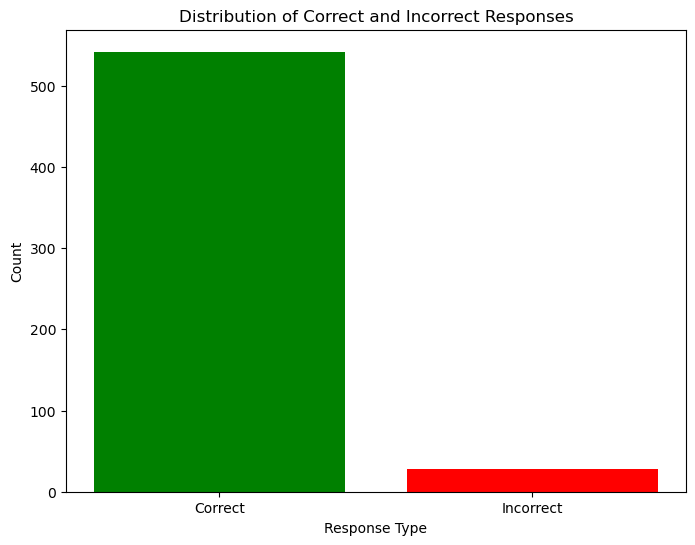

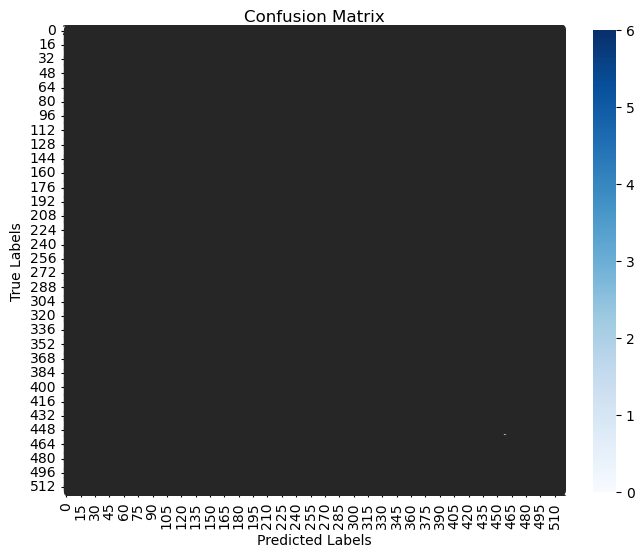

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
qa_pairs =[
        ("What is VIT?", "VIT stands for Vellore Institute of Technology."),
        ("Where is VIT located?", "VIT is located in Vellore, Tamil Nadu, India."),
        ("What are the regulations referred to as in its complete form?",
         "The regulations are called 'FFCS-CAL Academic Regulations Version 3.2' in its complete form."),
        ("What are the regulations referred to as in short form?",
         "In short form, the regulations are called 'FFCS-CAL Regulations 3.2'."),
        ("What academic programs are the regulations applicable to?",
         "The regulations are applicable to students admitted in B.Tech. (2015-2016) and M.Tech. (2016-2017) programs and thereafter to various degree programs."),
        ("Who decides the academic programs under FFCS?",
         "Academic programs under FFCS are decided by the Academic council."),
        ("When was the 'B.Tech. Degree Program Regulations 2008, FFCS Regulations - Version 1.00' originally approved?",
         "The regulations were originally approved by the 18th Academic Council held on 16th July 2009."),
        ("What was the approval date for 'FFCS Regulations Version 1.10'?",
         "'FFCS Regulations Version 1.10' was approved by the 20th Academic Council held on 26th March 2010."),
        ("When was the complete Academic Regulations Version 2.00 approved?",
         "The complete Academic Regulations Version 2.00 was approved by the 27th Academic Council held on 27th July 2012."),
        ("What changes were made on 15th August 2012?",
         "Minor modifications were carried out as per the procedure outlined in Section 21 on 15th August 2012, and the regulations were named as Version 2.10."),
        ("When was 'FFCS Regulations 3.0' approved?",
         "FFCS Regulations 3.0 was approved by the 37th Academic Council meeting held on 16th June 2015."),
        ("When was the modified CAL regulation as given in version 3.1 approved?",
         "The modified CAL regulation as given in version 3.1 was approved by the 46th Academic Council held on 24th August 2017."),
        ("What examinations do students seeking admission to B.Tech. and M.Tech. Programs need to undertake?",
         "Students seeking admission to various B.Tech. and M.Tech. Programs need to undertake national level computer-based competitive examinations - VITEEE and VITMEE, respectively, conducted by the University once a year."),
        ("How are selected students admitted into various programs?",
         "Selected students will be admitted into various programs through counseling."),
        ("How are students admitted to programs other than B.Tech. and M.Tech.?",
         "For all other programs, students will be admitted based on their merit by considering the marks obtained in the qualifying examinations, in addition to satisfying specific admission criteria of the programs as stipulated by the respective national level councils."),
        ("What are the minimum qualifications essential for admission to various programs of the University?",
         "The minimum qualifications essential for admission to various programs of the University will be stipulated and indicated in the Admissions brochure released before the commencement of admission to various programs every year."),
        ("What are the competitive examinations conducted for B.Tech. and M.Tech. Programs?",
         "The competitive examinations conducted for B.Tech. and M.Tech. Programs are VITEEE and VITMEE, respectively."),
        ("How often are the national level competitive examinations conducted by the University?",
         "The national level competitive examinations conducted by the University are held once a year."),
        ("How are the dates of the competitive examinations announced?",
         "The dates of the competitive examinations are announced separately through media/university website."),
        ("What is the mode of the competitive examinations?",
         "The competitive examinations are conducted in a computer-based mode."),
        ("What is the role of the University's counseling process in the admission of students?",
         "The University's counseling process facilitates the admission of selected students into various programs."),
        ("How are admission criteria determined for programs other than B.Tech. and M.Tech.?",
         "Admission criteria for programs other than B.Tech. and M.Tech. are determined based on merit in the qualifying examinations and specific criteria stipulated by national level councils."),
        ("What information is provided in the Admissions brochure released by the University?",
         "The Admissions brochure released by the University provides information on the minimum qualifications essential for admission to various programs."),
        ("When is the Admissions brochure released?",
         "The Admissions brochure is released before the commencement of admission to various programs every year."),
        ("What system is adopted for all programs offered by VIT?",
         "All programs offered by VIT adopt a Semester system, except the MBA program which is offered in trimester mode."),
        ("How many semesters are there in an academic year?", "There are two semesters in an academic year."),
        ("What are the durations of the Fall Semester and Winter Semester?",
         "Normally, the Fall Semester is from July to November, and the Winter Semester is from December to April."),
        ("Are there optional semesters offered during vacation periods?",
         "Yes, optional Intersession and Summer semesters may be offered during the Winter and Summer vacation periods respectively, subject to demand and availability of resources."),
        ("How are Winter session and Summer semesters offered?",
         "Both Winter session and Summer semesters are offered under a fast track mode, maintaining the number of instructional hours equivalent to that in the regular semester with a greater number of instruction hours per week."),
        ("What rules and regulations apply to courses offered during Intersession and Summer semesters?",
         "Unless otherwise specified explicitly, all rules and regulations applicable to a course offered during a regular semester also apply to courses offered during Intersession and Summer semesters."),
        ("How are the maximum number of courses and eligibility criteria specified?",
         "The maximum number of courses to be taken, eligibility criteria to register, and related information are specified through Circulars issued by the University from time to time."),
        ("What additional semesters may be offered based on need and availability of resources?",
         "Additional optional semesters may be offered based on the need and availability of resources."),
        ("What is the purpose of Weekend Intrasemester?","Weekend Intrasemester may be offered to students based on the requirement, during both the regular semesters (Fall and Winter)."),
        ("Is it mandatory for the University to offer intersessions, intrasessions, and summer semesters?","No, it is not binding on the University to offer these semesters or courses during these semesters. They are offered subject to the availability of resources."),
        ("What is VIT?", "VIT stands for Vellore Institute of Technology."),
        ("Where is VIT located?", "VIT is located in Vellore, Tamil Nadu, India."),
        ("What are the regulations referred to as in its complete form?",
         "The regulations are called 'FFCS-CAL Academic Regulations Version 3.2' in its complete form."),
        ("What are the regulations referred to as in short form?",
         "In short form, the regulations are called 'FFCS-CAL Regulations 3.2'."),
        ("What academic programs are the regulations applicable to?",
         "The regulations are applicable to students admitted in B.Tech. (2015-2016) and M.Tech. (2016-2017) programs and thereafter to various degree programs."),
        ("Who decides the academic programs under FFCS?",
         "Academic programs under FFCS are decided by the Academic council."),
        ("When was the 'B.Tech. Degree Program Regulations 2008, FFCS Regulations - Version 1.00' originally approved?",
         "The regulations were originally approved by the 18th Academic Council held on 16th July 2009."),
        ("What was the approval date for 'FFCS Regulations Version 1.10'?",
         "'FFCS Regulations Version 1.10' was approved by the 20th Academic Council held on 26th March 2010."),
        ("When was the complete Academic Regulations Version 2.00 approved?",
         "The complete Academic Regulations Version 2.00 was approved by the 27th Academic Council held on 27th July 2012."),
        ("What changes were made on 15th August 2012?",
         "Minor modifications were carried out as per the procedure outlined in Section 21 on 15th August 2012, and the regulations were named as Version 2.10."),
        ("When was 'FFCS Regulations 3.0' approved?",
         "FFCS Regulations 3.0 was approved by the 37th Academic Council meeting held on 16th June 2015."),
        ("When was the modified CAL regulation as given in version 3.1 approved?",
         "The modified CAL regulation as given in version 3.1 was approved by the 46th Academic Council held on 24th August 2017."),
        ("What examinations do students seeking admission to B.Tech. and M.Tech. Programs need to undertake?",
         "Students seeking admission to various B.Tech. and M.Tech. Programs need to undertake national level computer-based competitive examinations - VITEEE and VITMEE, respectively, conducted by the University once a year."),
        ("How are selected students admitted into various programs?",
         "Selected students will be admitted into various programs through counseling."),
        ("How are students admitted to programs other than B.Tech. and M.Tech.?",
         "For all other programs, students will be admitted based on their merit by considering the marks obtained in the qualifying examinations, in addition to satisfying specific admission criteria of the programs as stipulated by the respective national level councils."),
        ("What are the minimum qualifications essential for admission to various programs of the University?",
         "The minimum qualifications essential for admission to various programs of the University will be stipulated and indicated in the Admissions brochure released before the commencement of admission to various programs every year."),
        ("What are the competitive examinations conducted for B.Tech. and M.Tech. Programs?",
         "The competitive examinations conducted for B.Tech. and M.Tech. Programs are VITEEE and VITMEE, respectively."),
        ("How often are the national level competitive examinations conducted by the University?",
         "The national level competitive examinations conducted by the University are held once a year."),
        ("How are the dates of the competitive examinations announced?",
         "The dates of the competitive examinations are announced separately through media/university website."),
        ("What is the mode of the competitive examinations?",
         "The competitive examinations are conducted in a computer-based mode."),
        ("What is the role of the University's counseling process in the admission of students?",
         "The University's counseling process facilitates the admission of selected students into various programs."),
        ("How are admission criteria determined for programs other than B.Tech. and M.Tech.?",
         "Admission criteria for programs other than B.Tech. and M.Tech. are determined based on merit in the qualifying examinations and specific criteria stipulated by national level councils."),
        ("What information is provided in the Admissions brochure released by the University?",
         "The Admissions brochure released by the University provides information on the minimum qualifications essential for admission to various programs."),
        ("When is the Admissions brochure released?",
         "The Admissions brochure is released before the commencement of admission to various programs every year."),
        ("What system is adopted for all programs offered by VIT?",
         "All programs offered by VIT adopt a Semester system, except the MBA program which is offered in trimester mode."),
        ("How many semesters are there in an academic year?", "There are two semesters in an academic year."),
        ("What are the durations of the Fall Semester and Winter Semester?",
         "Normally, the Fall Semester is from July to November, and the Winter Semester is from December to April."),
        ("Are there optional semesters offered during vacation periods?",
         "Yes, optional Intersession and Summer semesters may be offered during the Winter and Summer vacation periods respectively, subject to demand and availability of resources."),
        ("How are Winter session and Summer semesters offered?",
         "Both Winter session and Summer semesters are offered under a fast track mode, maintaining the number of instructional hours equivalent to that in the regular semester with a greater number of instruction hours per week."),
        ("What rules and regulations apply to courses offered during Intersession and Summer semesters?",
         "Unless otherwise specified explicitly, all rules and regulations applicable to a course offered during a regular semester also apply to courses offered during Intersession and Summer semesters."),
        ("How are the maximum number of courses and eligibility criteria specified?",
         "The maximum number of courses to be taken, eligibility criteria to register, and related information are specified through Circulars issued by the University from time to time."),
        ("What additional semesters may be offered based on need and availability of resources?",
         "Additional optional semesters may be offered based on the need and availability of resources."),
        ("What is the purpose of Weekend Intrasemester?",
         "Weekend Intrasemester may be offered to students based on the requirement, during both the regular semesters (Fall and Winter)."),
        ("Is it mandatory for the University to offer intersessions, intrasessions, and summer semesters?",
         "No, it is not binding on the University to offer these semesters or courses during these semesters. They are offered subject to the availability of resources."),
        ("What is a curriculum in the context of an academic program?","In the context of an academic program, a curriculum is a prescribed list of courses grouped under various categories such as University Core, University Elective, Program Core, and Program Elective."),
        ("What are the different categories under which courses are grouped in a curriculum?",
         "Courses in a curriculum are typically grouped under various heads, including University Core, University Elective, Program Core, and Program Elective."),
        ("How is the completion of a degree program determined?",
         "A student is considered to have completed a degree program only if they have successfully cleared or completed all the necessary courses prescribed in their program curriculum."),
        ("What is the significance of the version number in a program curriculum?",
         "Each program curriculum has a version number tagged to the academic year to which it is applicable. Subsequent changes in the curriculum are indicated by a change in the curriculum version number."),
        ("Who is responsible for overseeing the curriculum of a program?",
         "The Head of the Department (HoD) or Program Chair is responsible for overseeing the curriculum of one or more programs."),
        ("What is the process for recommending changes in the curriculum?",
         "Any change in the curriculum must be recommended by the Board of Studies of the program concerned and submitted to the Academic Council by the Chairperson of the Board of Studies for approval."),
        ("What is a course syllabus?",
         "A course syllabus is a document that explains what a student is going to learn in that course. It includes details such as course code, course title, LTPJC, syllabus revision number, course prerequisites/co-requisites/anti-requisites, course objectives, expected course outcomes, modules with short topics, brief description of the topics, expected duration needed to cover each module, suggested text and reference books, and dates of recommendation and approval by the Board of Studies and the Academic Council."),
        ("What are the components of a course syllabus?",
         "Components of a course syllabus include course code, course title, LTPJC, syllabus revision number, course prerequisites/co-requisites/anti-requisites (if any), course objectives, expected course outcomes, modules with short topics, brief description of the topics, expected duration needed to cover each module, suggested text and reference books, and dates of recommendation and approval by the Board of Studies and the Academic Council."),
        ("What is the significance of the syllabus revision number?",
         "The syllabus revision number indicates the version of the syllabus. Any subsequent modifications to the syllabus approved by the Academic Council will be indicated by a change in the syllabus version number. A major change is indicated by an increment in the integer part, while minor changes are indicated by a change in the decimal part."),
        ("Who is responsible for creating and modifying the syllabus of a course?",
         "A Course Committee consisting of a minimum of three faculty members who have taught or are currently teaching the course is responsible for creating and modifying the syllabus. The School Deans may nominate members or alternate them periodically."),
        ("What is the role of the Course Committee?",
         "The Course Committee is responsible for content creation, modification, recommending course equivalences, and other related processes for the syllabus of a course."),
        ("Can other schools independently alter the syllabus of a course?",
         "No, the School which originally created the syllabus for offering the course is deemed to be its owner. Other schools may offer the course to their students in that form as a service course, but they cannot independently involve in altering the syllabus."),
        ("What is a course plan?",
         "A course plan consists of a list of lectures/experiments carried out in each instructional class/lab by the course teacher during the semester. It includes details such as the mode of delivery, reference material used, and others."),
        ("How many hours should be dedicated to different components for one course credit?",
         "For one course credit, 15 lecture hours for theory, 15 hours for tutorial, a minimum of 30 hours of laboratory work, or 60 hours of project work should be put in, within the regular semester period or in a summer/intersession/intrasession term."),
        ("Should separate course plans be prepared for the theory, laboratory, or project portions of a course?",
         "Yes, separate course plans should be prepared for the theory, laboratory, or project portions of any course if the course has an embedded lab and/or project component. Lab exercises and projects given to students should reflect the syllabus content of the course."),
        ("What is a course flowchart?",
         "A course flowchart describes how various courses under Program Core (PC), Program Elective (PE), and University Core (UC) are connected through prerequisites, if any. It uses standard pictorial representations to indicate the basket it belongs to and is grouped to indicate the level of the course. It also indicates necessary pre-, anti-, co-requisites, and its LTPJC for each course along with its course code."),
        ("How are courses classified in terms of course types?",
         "Courses may be classified as Theory only (TH), Lab only (LO), Project only (PJT), Embedded Theory and Lab (ETL), Embedded Lab and Project (ELP), Embedded Theory and Project (ETP), Embedded Theory, Lab, and Project (ETLP). Additionally, courses such as Seminar, Mini Project/Design Project/Summer Project/Innovation project, Capstone project, Master’s Dissertation/Thesis, Comprehensive exam, Industrial internship, Co-/Extra-Curricular, IIP/TARP/LSM/Engineering Drawing are generally grouped under 'Project type'."),
        ("What is the purpose of introducing a 'J' component in courses?",
         "Under CAL, at least 40% of courses in the curriculum shall have a 'J' component (Project) as part of the course to implement PBL concepts. The introduction of 'J' aims to improve 'learning by doing' and increase the academic engagement of students. For the 'J' component, the student has to take up a project related to the course in consultation with the faculty concerned and complete the project within the semester. The project can be a group project with a maximum of ten members, thus promoting participatory and peer learning. There will be a minimum of three reviews conducted in a semester for the project courses/components, and the marks will be awarded and taken for final assessment."),
        ("Are there any specific requirements for courses offered in the first semester?",
         "Courses offered in the first semester may not have any 'J' component."),
        ("What are the various heads under which courses are grouped in a program curriculum?",
         "Courses in a program curriculum are grouped under various heads, including University Core, University Elective, Program Core, and Program Elective."),
        ("What does the curriculum of a program contain?",
         "The curriculum of a program contains a prescribed list of courses grouped under various heads, as well as details such as course titles, course codes, and syllabus revision numbers."),
        ("How is a student considered to have completed a degree program?",
         "A student is considered to have completed the degree program only if they have successfully cleared/completed all the necessary courses prescribed in their program curriculum."),
        ("What is the significance of the version number in a program curriculum?",
         "Each program curriculum has a version number tagged to the Academic Year to which it is applicable. Subsequent changes in the curriculum are indicated by a change in the curriculum version number."),
        ("Who is responsible for recommending changes in the curriculum?",
         "Changes in the curriculum should be recommended by the Board of Studies of the program concerned and submitted to the Academic Council by the Chairperson of the Board of Studies for approval."),
        ("What elements should be clearly defined while framing a curriculum?",
         "Program Educational Objectives (PEOs), Program Outcomes (POs), Additional Program Outcomes (APOs)/Student Learning Outcomes (SLOs), and Program Specific Outcomes (PSOs) should be clearly defined while framing a curriculum."),
        ("What is the role of a Course Committee in managing a course syllabus?",
         "A Course Committee, consisting of a minimum of three faculty members who have taught the course in the past or are currently teaching it, is responsible for content creation, modification, recommending course equivalences, and other related processes."),
        ("Who is considered responsible for a course syllabus?",
         "The Course Committee is considered responsible for the syllabus, and the School which originally created the syllabus for offering the course is deemed to be its owner."),
        ("What is the purpose of a course plan?",
         "A course plan outlines the list of lectures/experiments to be carried out in each instructional class/lab by the course teacher during the semester, along with details such as mode of delivery, reference material used, and others."),
        ("How are various courses connected through prerequisites represented in a course flowchart?",
         "A course flowchart shows how various courses under Program Core (PC), Program Elective (PE), and University Core (UC) are connected through prerequisites, if any. It indicates necessary pre-, anti-, co-requisites, and its LTPJC for each course along with its course code."),
        ("How is each course identified?", "Each course is identified by a unique Course Code consisting of seven alphanumerals, with three alphabets followed by four digits. The alphabets reflect the discipline/subdiscipline, and the digits indicate the cognitive level and running serial number of the course."),
        ("What does the first numeral in the Course Code represent?", "The first numeral (after the alphabet) in the Course Code indicates the cognitive level of the course as per the course flow chart."),
        ("How are course revisions tracked?", "Each course has its version to track the revisions carried out in its syllabus over time."),
        ("What is the minimum duration required to complete a program?", "The minimum duration required to complete a program is stipulated in accordance with the time period stipulated by national statutory bodies."),
        ("When is a student considered to have completed a program?", "A student is considered to have completed a program only if they complete the minimum courses assigned and earn the required credits as specified by their program curriculum. However, the degree will be awarded only upon completion of the minimum duration of the program."),
        ("Are the general rules and regulations applicable to special programs?", "Yes, the general rules and regulations stipulated in the document are applicable to special programs, including double and dual degrees. However, their specific requirements will be as laid down and approved by the Academic Council separately, from time to time."),
        ("Are students allowed to study additional courses after meeting their minimum credit requirements?", "No, students will not be permitted to study additional courses after they have met their minimum credit requirements."),
        ("What is the maximum duration for completing a program?", "The maximum duration for completing a program is given in Section 19 of the document."),
        ("What is a course credit?", "A course credit is a measurement of the duration that a course is offered as an instruction to students."),
        ("How long is a semester deemed to have?", "A semester is deemed to have 15 instructional (non-exam) weeks."),
        ("How is the duration of a lecture (L) measured in terms of credits?", "A classroom lecture (L) of 50 minutes duration per week, carried out during all weeks of the semester, is considered as one Instructional Unit or one Credit."),
        ("How is the duration of a tutorial (T) measured in terms of credits?", "A tutorial (T) of 50 minutes duration per week, carried out during all weeks of the semester, is considered as one Instructional Unit or one Credit."),
        ("How is the duration of laboratory sessions/practicals/field work/training (P) measured in terms of credits?", "A minimum of 100 minutes per week of laboratory session/practical or field work/training (P) or a combination of these, carried out during all weeks of the semester, is considered as one Instructional Unit or one Credit."),
        ("How is the duration of project activity (J) measured in terms of credits?", "A minimum of 4 hours of project activity (J) per week carried out during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("What does an LTPJC of 2-1-2-4-5 indicate?", "An LTPJC of 2-1-2-4-5 means 2 instructional units based on classroom lecture (L), one instructional unit of tutorial (T), one laboratory (P) based instructional unit (of 100 minutes), one project (J) component (of 200 minutes) - all delivered during a calendar week, and repeated for the entire duration of the semester to earn five credits (C) after passing the course."),
        ("Are there any additional course components mentioned?", "Yes, specialized programs may have course components as directed by their respective council. For example, a law program may incorporate 'moot court' as one of the course components. However, these deviations should be brought for approval by the Academic Council."),
        ("What is the minimum credit requirement for program completion?", "The minimum credit requirement for the completion of a program is clearly specified in the program curriculum."),
        ("What else does a student have to meet besides the minimum credit requirement to become eligible for the degree?", "Besides the minimum credit requirement, the student has to meet the course and credit distribution as specified under section 6.3."),
        ("Is it possible for a student to attain the minimum credits without completing all requisite courses/credits under University Elective (UE)/Program Elective (PE) courses?", "Yes, due to various features of FFCS, it is possible for a student to attain the minimum credits without completing all requisite courses/credits under University Elective (UE)/Program Elective (PE) courses."),
        ("What is mandatory for a student in such circumstances?", "In such circumstances, though the student has attained the total minimum credits, it is mandatory for the student to complete all courses under UC and PC and also to meet the credit requirements under UE and PE to become eligible for the degree."),
        ("What is expected in terms of credit distribution across disciplines?", "It is expected that all programs should accommodate courses from other disciplines, so that students will have multi-disciplinary exposure."),
        ("What skills should be provided sufficient opportunity to enhance?", "All programs should provide sufficient opportunity to students to enhance their communication, soft skills, management, and technical skills."),
        ("Under what categories should the courses fall depending on the program?", "Depending on the program, the courses should fall under engineering, science, humanities, and management categories."),
        ("What is the maximum deviation permitted in credits under each discipline?", "A maximum deviation of 3% in credits is permitted under each discipline."),
        ("What is the purpose of including courses from different disciplines in the curriculum?", "The purpose is to ensure that students have multi-disciplinary exposure."),
        ("What are the different groups into which the curriculum of each program is generally divided?", "The curriculum of each program is generally divided into University Core (UC), Program Core (PC), Program Elective (PE), and University Elective (UE)."),
        ("What are University Core (UC) courses?", "University Core (UC) courses are mandatory to all similar degree programs and are basic in nature, expected to enhance students' fundamental knowledge in various disciplines apart from their own."),
        ("Give an example of a requirement under University Core (UC).", "For example, UC may specify that each student should take a foreign language course(s) for 2 credits, which can be met by taking any course offered from a basket of foreign language courses."),
        ("What are Program Core (PC) courses?", "Program Core (PC) courses are program specific, and students have to complete all the courses listed under PC to become eligible for the degree."),
        ("What is the purpose of Program Elective (PE) courses?", "Program Elective (PE) courses give students an opportunity to study courses which are more advanced or applied or specialized than the basic courses studied as part of program core courses."),
        ("What is the approximate ratio of total credits offered under PE to the number of credits a student should complete under PE according to the CAL program curriculum?", "The total credits offered under PE in the curriculum should be approximately 2.5 times the number of credits a student should complete under PE."),
        ("What role do PE courses play in offering 'Honours' credentials?", "PE courses play a crucial role in offering 'Honours' credentials."),
        ("What happens if a new PE is added to a curriculum of a program?", "If a new PE is added to a curriculum of a program, students adopting the earlier curriculum applicable to their year of joining are also permitted to register the same as their PE, since it ultimately helps them to expand their knowledge."),
        ("What is the desirable ratio of credits between PC and PE courses?", "It is desirable that the ratio of credits between PC and PE courses is in the range of 50:50 to 60:40."),
        ("What is the definition of a course credit?", "A course credit is a measurement of the duration that the course is offered as an 'instruction' to students."),
        ("How is the duration of a course credit determined?", "The duration of a course credit is determined based on the instructional units provided during a semester."),
        ("What are the different types of instructional units considered for calculating course credits?", "The different types of instructional units considered are Lecture (L), Tutorial (T), Practical (P), and Project (J)."),
        ("How is the duration of each instructional unit measured?", "Each instructional unit is measured as 50 minutes per week."),
        ("What is the total duration of a semester?", "A semester is deemed to have 15 instructional (non-exam) weeks."),
        ("How are course credits calculated for Lecture (L) and Tutorial (T) components?", "Each Lecture (L) or Tutorial (T) component conducted for 50 minutes per week during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("How are course credits calculated for Practical (P) components?", "A minimum of 100 minutes per week of laboratory session/practical or field work/training, or a combination of these, carried out during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("How are course credits calculated for Project (J) components?", "A minimum of 4 hours of project activity per week carried out during all weeks of the semester is considered as one Instructional Unit or one Credit."),
        ("What is the significance of the LTPJC notation for a course?", "The LTPJC notation specifies the number of credits delivered as Lecture (L), Tutorial (T), Practical (P), Project (J), and the total instructional delivery indicated as Credits (C) for the course."),
        ("Can courses have additional components apart from Lecture (L), Tutorial (T), Practical (P), and Project (J)?", "Yes, specialized programs may have additional course components directed by their respective councils, such as 'moot court' for law programs."),
        ("Who approves deviations from the standard credit distribution among different disciplines?", "Deviations from the standard credit distribution among different disciplines should be brought for approval by the Academic Council."),
        ("What is a University Elective (UE)?", "A University Elective (UE) is a course that students can choose from any discipline, subject to eligibility criteria specified under Annexure - II."),
        ("Can a University Elective (UE) be a course that is part of the University Core (UC) or Program Core (PC)?", "No, a University Elective (UE) cannot be a course specified under University Core (UC) or Program Core (PC) in the student's curriculum."),
        ("How are credits for University Electives (UE) calculated?", "The number of credits a student is permitted to take under University Electives (UE) is fixed, and students can fulfill this requirement by taking a combination of smaller course credits."),
        ("Can students take Program Elective (PE) courses listed in their curriculum as University Electives (UE)?", "Yes, students not willing to take courses from other disciplines can take the Program Elective (PE) courses listed in their curriculum as University Electives (UE) to fulfill the credits requirements under UE."),
        ("Are Audit courses eligible to be credited again under the University Elective (UE) option?", "No, an Audit course already cleared by the student cannot be credited again under the University Elective (UE) option."),
        ("Can PG level courses be taken as University Elective (UE) courses by UG program students?", "Yes, PG level courses can be taken as University Elective (UE) courses by UG program students subject to the conditions stipulated under Section 11."),
        ("What is the duration of Industrial Internship and how many credits does it carry?", "Industrial Internship lasts for four weeks and carries 2 credits."),
        ("When should students undergo Industrial Internship?", "Students should undergo Industrial Internship any time after their first year of study."),
        ("How can B.Tech. students avail Industrial Internship training?", "B.Tech. students can avail Industrial Internship training in a single stretch of four weeks (28 days) or in two stretches of two-weeks duration."),
        ("What is the purpose of Industrial Internship?", "The purpose of Industrial Internship is to provide students with exposure to an academic environment different from their future work environment, such as industry, to prepare them for their future careers."),
        ("Who assists students in identifying an industry and getting necessary approval for Industrial Internship?", "Each School identifies a faculty in-charge of Industrial Internship at the program level, who assists the students in identifying an industry and obtaining necessary approval."),
        ("What is expected from students during their Industrial Internship?", "During their Industrial Internship, students are expected to maintain a digital log of their activity and learning."),
        ("What documents are required to be uploaded after completing Industrial Internship?", "At the end of the Industrial Internship, students are required to upload a report along with completion certificate(s) from the Industry where they had received the training into the academic software."),
        ("Who evaluates the Industrial Internship training?", "Schools form 'Industrial Internship evaluation committees' to evaluate the Industrial Internship training, based on entries made in the activity log."),
        ("Can students register for the Industrial Internship course in a subsequent semester for evaluation?", "Yes, students who have completed their training may register for the Industrial Internship course in a subsequent semester for evaluation by the School."),
        ("How many weeks of Industrial Internship are required for B.Tech. students?", "B.Tech. students are required to undergo four weeks of Industrial Internship in a reputed industry in their respective discipline of study."),
        ("Is there flexibility in the duration of Industrial Internship for B.Tech. students?", "Yes, B.Tech. students can choose to complete their Industrial Internship in a single stretch of four weeks (28 days) or in two stretches of two-weeks duration."),
        ("What should students do during their Industrial Internship?", "During their Industrial Internship, students are expected to gain practical experience and learn about the functioning of the industry relevant to their field of study."),
        ("What is the role of the faculty in-charge of Industrial Internship?", "The faculty in-charge of Industrial Internship assists students in selecting suitable industries, obtaining necessary approvals, and provides guidance throughout the internship period."),
        ("What is the purpose of Capstone Project / Master Thesis?", "The purpose of Capstone Project / Master Thesis is for students to carry out an innovative project work during their final semester of study, applying the knowledge gained in their courses/labs, and demonstrating their analytical, design, fabrication ability, and presentation skills."),
        ("Who assigns a faculty member as a guide for the Capstone Project / Master Thesis?", "Each student is assigned a faculty member as a guide within their School for the Capstone Project / Master Thesis."),
        ("Can students opt for a guide outside their School for the Capstone Project / Master Thesis?", "With the permission of HoD/Program Chair, students may opt for a guide outside their School for the Capstone Project / Master Thesis."),
        ("What is the consequence of submitting a project that was bought (purchased/ borrowed/ submitted) from another institution?", "Submitting a project that was bought (purchased/ borrowed/ submitted) from another institution is considered examination malpractice and will result in an 'N' grade. The student must register again and clear the project in a subsequent semester."),
        ("Are group projects permitted at undergraduate level programs?", "Yes, group projects are permitted at undergraduate level programs."),
        ("What is the duration of the project work for programs other than M.Tech.?", "All programs other than M.Tech. shall have a minimum period of one semester for carrying out the project work."),
        ("What is the minimum project period for M.Tech. Master’s Thesis?", "M.Tech. Master’s Thesis shall have a minimum project period of two semesters or 9 months."),
        ("Can students do courses along with their project work?", "Yes, students are permitted to do courses along with their project work, subject to the maximum credits permitted for registration as specified in Section 7.3."),
        ("How are students doing their projects abroad involved in reviews?", "Students doing their projects abroad can participate in the reviews through online mode."),
        ("What is the format of the Student Project report?", "The format of the Student Project report should be in accordance with the format prescribed by the University/School."),
        ("What is the role of the Student Project Monitoring Committee?", "The Student Project Monitoring Committee evaluates student project work and monitors their progress. Students need to make a presentation to this committee after the end of their pre-final semester FATs."),
        ("Can students undertake domain-specific project work during their internship?", "Yes, students can undertake domain-specific project work under the guidance of the assigned faculty guide during their internship."),
        ("How are the final project reports evaluated?", "The final project reports are evaluated by a panel of examiners consisting of HoD/Program Chair as Chairman of the Committee, External Examiner, one Internal Expert, Guide, and Co-guide ."),
        ("What is the expected content of the Capstone Project / Master Thesis?", "The Capstone Project / Master Thesis may involve theoretical analysis, modeling & simulation, experimentation & analysis, prototype design, fabrication of new equipment, correlation and analysis of data, or a combination of these."),
        ("Who determines the time limits for monitoring and evaluating student performance during the project?", "Various time limits specified for monitoring and evaluating student performance during the project are determined according to the table provided."),
        ("How is the performance grade determined for the industrial internship?", "The performance grade for the industrial internship is determined based on the industrial internship report and the student's performance during the related viva voce."),
        ("What happens if a student fails or is absent from the final viva voce examination?", "Failure or absence in the final viva-voce examination results in the re-registration of the project."),
        ("Can students carry out group projects at the postgraduate level?", "Students of postgraduate programs are expected to carry out individual projects, though group projects are permitted at the undergraduate level."),
        ("What is the maximum duration for postgraduate projects?", "The project duration for postgraduate programs may be increased up to one year."),
        ("When is the first review of the student project conducted?", "The first review of the student project, which involves the acceptance of the project title, is conducted after the completion of the prefinal semester FATs."),
        ("What is the weightage of the first review in the evaluation process?", "The first review of the student project carries a weightage of 5% in the evaluation process."),
        ("When should the draft report be submitted to the internal guide?", "The draft report should be submitted to the internal guide 10 calendar days before the viva voce exam."),
        ("How many days before the viva voce exam should the synopsis be submitted?", "The synopsis should be submitted 7 calendar days before the viva voce exam."),
        ("When is the final submission of the project report required?", "The final submission of the project report in its final form is required one instructional day before the viva voce exam."),
        ("What is the weightage of the third (final) review in the evaluation process?", "The third (final) review of the student project carries a weightage of 50% in the evaluation process."),
        ("What are the components of the 50% weightage in the final review?", "Of the 50% weightage in the final review, 20% goes to project report evaluation by the guide, 5% for the poster, and 25% goes to the viva voce examination conducted by the external examiner."),
        ("Can a student register for the project work in a semester other than the final semester?", "Yes, under special circumstances, a student can register for the project work in a semester other than the final semester, provided they have earned a minimum credit as indicated."),
        ("What is the purpose of preparing a poster as part of the project?", "Preparing a poster as part of the project highlights the student's work and serves as an opportunity to showcase their achievements. The poster carries 5% weightage of the total marks of the project course."),
        ("How is the poster evaluated?", "The poster is evaluated by a faculty team appointed by the school, who visit the venue where the posters are displayed. Students explain their work to the faculty team during the evaluation process."),
        ("What is the purpose of the industrial internship or exposure training?", "The purpose of the industrial internship or exposure training is to provide students with exposure to an academic environment different from their future work environment, such as industry, where they are expected to be placed."),
        ("How long is the industrial internship or exposure training?", "The industrial internship or exposure training lasts for four weeks and carries 2 credits."),
        ("Who assists students in identifying an industry and obtaining necessary approval for the industrial internship?", "A faculty member in charge of industrial internship at the program level assists students in identifying an industry and obtaining necessary approval."),
        ("What is the minimum period for carrying out the project work for all programs other than M.Tech.?", "The minimum period for carrying out the project work for all programs other than M.Tech. is one semester."),
        ("How long is the minimum project period for M.Tech. Master's Thesis?", "The minimum project period for M.Tech. Master's Thesis is two semesters or 9 months."),
        ("Can students do courses along with their project work?", "Yes, students can do courses along with their project work, subject to the maximum credits permitted for registration as specified in Section 7.3."),
        ("What happens if students fail or are absent in the final viva voce examination?", "Failure or absence in the final viva voce examination results in re-registration of the project."),
        ("Is group project work permitted at the undergraduate level?", "Yes, group project work is permitted at the undergraduate level, but students of postgraduate programs are expected to carry out individual projects."),
        ("What is the purpose of the Student Project Monitoring Committee?", "The purpose of the Student Project Monitoring Committee is to conduct the final review (viva voce examination) of the student project."),
        ("How is the final project report evaluated?", "The final project report is evaluated by a panel of examiners consisting of the HoD/Program Chair as the Chairman of the Committee, an external examiner, one internal expert, guide, and co-guide (where applicable)."),
        ("What is cooperative education (co-op)?", "Cooperative education (co-op) is an academic program that links classroom studies with professional work experience in a field related to a student’s career goals."),
        ("How long is the co-op period?", "The co-op period is for 6 months."),
        ("Is participation in the co-op program mandatory for all students?", "No, participation in the co-op program is provided as an option only and is not binding on all students of the program."),
        ("What happens to the degrees of students accepting the co-op program?", "Students accepting the co-op program shall receive their degrees after the completion of the co-op period only."),
        ("How are co-op courses indicated on the Grade Sheet and Consolidated Grade Sheet?", "Co-op courses are indicated as Pass/Fail courses with no credits assigned, and the credits earned will not be considered for GPA/CGPA calculation."),
        ("What is the Semester Abroad Program (SAP) at VIT?", "VIT's Semester Abroad Program (SAP) encourages undergraduate/final year and postgraduate students from all streams to pursue their final semester in other universities abroad."),
        ("What activities are involved in the Semester Abroad Program (SAP)?", "Students take up their Capstone Project in the campus of the University Abroad under the guidance of a faculty member from that University in addition to a guide from VIT."),
        ("What is the SET Conference?", "The SET Conference is organized towards the end of each semester by any one of the Schools, and it aims to provide a platform for PG students to present their SET project results."),
        ("What is the weightage of the SET project work in the evaluation process?", "The SET project work carried out by the student carries 75% weightage in the evaluation process."),
        ("How are SET projects evaluated?", "Of the 75% weightage for the SET project, 50% is awarded by the project guide and the balance 25% by the School SET Project Evaluation Committee."),
        ("What is the purpose of the SET Project?", "The SET Project aims to provide PG students with an opportunity to carry out research and present their findings at the SET Conference."),
        ("How many SET projects are PG students required to carry out?", "M.Tech. students shall carry out one SET Project in each of their first and second semesters. M.Sc. and MCA students shall carry out one SET Project in each of their semesters, except during their Master's Thesis Semester."),
        ("What is the weightage of the published research article in the evaluation of the SET Project?", "The published/communicated research article contributes 25% to the evaluation of the SET Project."),
        ("Who evaluates the published research article for the SET Project?", "The School SET Project Evaluation Committee, which includes the project guide as a member, evaluates the published research article."),
        ("What are the credit requirements for the SET Project?", "Each SET project carries 2 credits."),
        ("What is the role of the guide in the Semester Abroad Program (SAP)?", "The guide from VIT and a faculty member from the University Abroad jointly supervise the progress of the student's Capstone Project during the Semester Abroad Program (SAP)."),
        ("Are students allowed to participate in courses alongside their project work during the Semester Abroad Program?", "Yes, students are permitted to do courses alongside their project work during the Semester Abroad Program, subject to the maximum credits permitted for registration."),
        ("How long is the minimum project period for M.Tech. Master's Thesis?", "The minimum project period for M.Tech. Master's Thesis is two semesters or 9 months."),
        ("Can students doing projects abroad participate in project reviews through online mode?", "Yes, students doing projects abroad can participate in reviews through online mode."),
        ("What is the format of the Student Project report?", "The format of the Student Project report should be in accordance with the format prescribed by the University/School."),
        ("What is the purpose of the Comprehensive Examination?", "The Comprehensive Examination is conducted to evaluate the comprehensive knowledge the student has gained in all the courses, analytical ability, and comprehension in the field of specialization."),
        ("How many credits does a student need to earn to be eligible for the Comprehensive Examination in B.Tech. Programs?", "A student needs to earn a minimum of 115 credits to be eligible for the Comprehensive Examination in B.Tech. Programs."),
        ("Who is exempted from attending the Comprehensive Examination conducted by the institute?", "Any student with a valid 'GATE Score' is exempted from attending the Comprehensive Examination conducted by the institute."),
        ("What are Hack-a-thons and Make-a-thons?", "Hack-a-thons and Make-a-thons are activities conducted on campus to promote additional learning and activity-oriented learning experiences."),
        ("How many additional marks can a student receive for participating in Hack-a-thons, Make-a-thons, or similar activities?", "A student can receive a maximum of 10 additional marks, which can be added to the CAM score for one course per semester."),
        ("What is the maximum limit for total internal marks, including additional marks?", "The total internal marks, including additional marks, are given an upper limit of 60, with 40 marks being allocated to final assessment."),
        ("Who approves the inclusion of additional marks for activities like projects or online courses?", "Prior approval from the faculty handling the course and the School Dean is essential for the inclusion of additional marks for such categories."),
        ("Is additional learning limited to Hack-a-thons and Make-a-thons?", "No, additional learning is not limited to Hack-a-thons and Make-a-thons. Other activities may also qualify for additional marks, subject to approval."),
        ("How is the type of activities that can be considered for additional marks communicated to students?", "The type of activities that can be considered for additional marks will be communicated through circulars issued by the University."),
        ("What is Cooperative Education (co-op)?", "Cooperative Education (co-op) is an academic program that links classroom studies with professional work experience in a field related to a student’s career goals."),
        ("What is the duration of the Co-op period?", "The Co-op period is for 6 months."),
        ("When do students receive their degrees if they participate in the Co-op program?", "Students receive their degrees after the completion of the Co-op period only."),
        ("How are credits earned during the Co-op program treated?", "Credits earned during the Co-op program are indicated in the Grade Sheet and Consolidated Grade Sheet as a Pass/Fail course with no credits assigned, and they are not considered for GPA/CGPA calculation."),
        ("What is the Semester Abroad Program (SAP)?", "The Semester Abroad Program (SAP) allows undergraduate and postgraduate students to pursue their final semester in other universities abroad."),
        ("What activities are part of the SAP?", "In the SAP, students take up their Capstone Project in the campus of the University Abroad under the guidance of a Faculty member from that University in addition to a guide from VIT."),
        ("How is the progress of SAP projects monitored?", "The progress of SAP projects is monitored by both the guides, and periodic evaluations are conducted."),
        ("What is the SET Conference?", "The SET Conference is organized towards the end of each semester, where students present their Science, Engineering, and Technology (SET) projects."),
        ("What is the weightage of the SET project in the overall evaluation?", "The SET project work carried out by the student carries 75% weightage, with 50% awarded by the project guide and 25% by the School SET Project Evaluation Committee."),
        ("How are SET project results disseminated?", "It is compulsory for all PG students to publish their project results in the form of a paper published during the SET Conference of that semester."),
        ("What is Course Registration?", "Course Registration is the process through which students select and enroll in the courses they wish to study in a semester."),
        ("When is Course Registration carried out?", "Course Registration is carried out on specific day(s) as declared by the University."),
        ("What happens if a student has outstanding dues during Course Registration?", "Students with outstanding dues to the University will be permitted to register for courses but will not be allowed to attend classes until they pay the fees."),
        ("Is late registration permitted?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean concerned and on payment of a late registration fee."),
        ("What happens if a student fails to register the minimum number of courses?", "If a student fails to register the minimum number of courses in any semester, their studentship with the University may be cancelled."),
        ("How are courses offered to students?", "Students will be offered more courses than what a normal student is expected to take, and they can choose courses from a 'wish list' collected from students. Schools decide the courses to be offered in each semester based on requirements."),
        ("What is the role of a Proctor in Course Registration?", "Upon joining the University, each student will be assigned a Proctor who will discuss the student's academic performance in previous semester(s) and suggest courses to be registered in the ensuing semester."),
        ("What are Bridge Courses?", "Bridge Courses are special courses recommended to students during the first semester to compensate for inadequacy in language proficiency and other necessary fundamental disciplines. These courses are based on a screening test or previous qualifying examination subjects."),
        ("Do Bridge Courses count towards CGPA calculation?", "No, the credits and grades obtained in Bridge Courses will not be counted in the CGPA calculation or towards the minimum credit requirements for program completion."),
        ("Can students choose their own study pace during Course Registration?", "Yes, students can change the pace at which they study (fast/slow) since slot timetable is adopted, allowing them to choose their own slots from multiple slots offered for the same course."),
        ("What is the workflow for Course Registration?", "The workflow for Course Registration is depicted in Annexure IV, although it is subject to change depending on requirements."),
        ("What is the purpose of assigning a Proctor to students?", "The Proctor is assigned to discuss the student's academic performance, suggest courses for registration, and provide guidance within the framework of the program curriculum."),
        ("How are courses offered to students?", "Students are offered more courses than what a normal student is expected to take, and they can choose courses from a 'wish list' collected from students. Schools decide the courses to be offered in each semester based on requirements."),
        ("What is the role of a Proctor in Course Registration?", "Upon joining the University, each student will be assigned a Proctor who will discuss the student's academic performance in previous semester(s) and suggest courses to be registered in the ensuing semester."),
        ("What are Bridge Courses?", "Bridge Courses are special courses recommended to students during the first semester to compensate for inadequacy in language proficiency and other necessary fundamental disciplines. These courses are based on a screening test or previous qualifying examination subjects."),
        ("Do Bridge Courses count towards CGPA calculation?", "No, the credits and grades obtained in Bridge Courses will not be counted in the CGPA calculation or towards the minimum credit requirements for program completion."),
        ("What happens if a student fails to register the minimum number of courses in any semester?", "If a student fails to register the minimum number of courses in any semester, their studentship with the University is liable to be cancelled."),
        ("Is late registration permitted?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean concerned and on payment of a late Registration fee as specified by the University."),
        ("What is the consequence of having outstanding dues during Course Registration?", "Students with outstanding dues to the University will be permitted to register for courses but will not be allowed to attend classes until they pay the fees."),
        ("How are courses chosen for registration?", "Students can choose courses from a 'wish list' collected from students, and Schools decide the courses to be offered in each semester based on requirements."),
        ("Are students allowed to change their study pace?", "Yes, students can change their study pace (fast/slow) since slot timetable is adopted, allowing them to choose their own slots from multiple slots offered for the same course."),
        ("What are the minimum and maximum credit limits for course registration in a regular semester?", "Students can register for a maximum of 27 credits or a minimum of 16 credits in a regular semester."),
        ("What happens if a student has a CGPA less than 4.0?", "If a student has a CGPA less than 4.0 at any time during their study, they will be advised to register for a maximum of 20 credits."),
        ("What is the consequence for students with less than 4.0 CGPA who fail to improve their performance in subsequent semesters?", "Students with less than 4.0 CGPA who fail to improve their performance in subsequent semesters may have their studentship cancelled, pending recommendations from a Committee under the Dean of Academics to the Vice-Chancellor."),
        ("What is the credit range for course registration during summer/intersession/weekend semesters?", "During summer/intersession/weekend semesters, students can register for between 6 and 8 credits, or 2 courses, whichever is less. In special cases, they may be permitted to register for a maximum of 12 credits with approval."),
        ("Is there a minimum number of credits fixed for course registration during summer/intersession/weekend semesters?", "No, there is no minimum number of credits fixed for course registration during summer/intersession/weekend semesters."),
        ("What is the process for registering backlog courses?", "Students with backlog courses can re-register them in subsequent semesters or special terms. They must pay a re-registration fee and register for all components of the course if opting for re-registration."),
        ("What happens if a student fails a course due to lack of marks in the lab/project component of an embedded course?", "If a student fails a course due to lack of marks in the lab/project component of an embedded course, they must re-register the lab/project component alone."),
        ("What courses will not be considered as backlog?", "Courses with a 'W' grade (course withdraw) will not be considered as backlog."),
        ("What is the process for clearing backlog courses through arrear examinations?", "Students should register for all course components if opting to clear the course through arrear examinations. Component-based registration is not applicable for arrear examinations."),
        ("What is the consequence if a student fails to clear a course through arrear examination and wishes to clear it through re-registration?", "If a student fails to clear a course through arrear examination and wishes to clear it through re-registration, they must register for all components of the course."),
        ("What is the average academic load for most students in a semester?", "The average academic load for most students in a semester is 23 credits."),
        ("What is the consequence if a student fails to register the minimum number of courses in any semester?", "If a student fails to register the minimum number of courses in any semester, their studentship with the University is liable to be cancelled."),
        ("How are courses offered to students each semester?", "Courses offered to students each semester are decided based on the requirements or a 'wish list' collected from students, and the list of courses offered by each program is announced prior to registration."),
        ("What is the role of the Proctor in course registration?", "Upon joining the University, each student is assigned a Proctor who advises them on their academic performance in previous semesters and suggests the number and nature of courses to be registered in the ensuing semester, within the framework of the program curriculum."),
        ("What are bridge courses and when are they advised?", "Bridge courses are special courses advised during the first semester of all programs to compensate for a student's inadequacy in language and other necessary fundamental disciplines. They are recommended based on a screening test or previous qualifying examination subjects."),
        ("What is the minimum number of credits a student can register during a summer/intersession/weekend semester?", "The minimum number of credits a student can register during a summer/intersession/weekend semester is 6."),
        ("What is the maximum number of credits a student can register during a summer/intersession/weekend semester?", "In special cases, the maximum number of credits a student can register during a summer/intersession/weekend semester is 12 with approval."),
        ("What is the consequence for students with CGPA less than 4.0 during their study?", "Students with CGPA less than 4.0 at any time during their study may be advised to register for a maximum of 20 credits."),
        ("Who decides the courses to be offered each semester?", "Courses offered each semester are decided by the Schools based on requirements or a 'wish list' collected from students."),
        ("What is the process for late registration?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean and on payment of a late registration fee."),
        ("Can students with backlogs register for the next level course?", "Yes, students with backlogs can register for the next level course if they have cleared all the components individually."),
        ("What happens if a student fails a course due to lack of marks in the lab/project component?", "If a student fails a course due to lack of marks in the lab/project component, they must re-register the lab/project component alone."),
        ("Is there a fee associated with re-registration?", "Yes, students must pay a re-registration fee for re-registering courses."),
        ("Are students allowed to register for courses without clearing backlogs?", "Yes, students are allowed to register for courses without clearing backlogs, but they must pay a re-registration fee for the backlog courses."),
        ("What is the consequence if a student fails to improve their performance after being advised to register for a maximum of 20 credits?", "If students with less than 4.0 CGPA fail to improve their performance in subsequent semesters, their studentship may be cancelled pending recommendations from a Committee under the Dean of Academics."),
        ("During which days is the option to add or drop a course given?", "The option to add or drop a course is given during the first three instructional days of the semester."),
        ("What happens to courses that are dropped during the Add/Drop process?", "Courses that are dropped during the Add/Drop process will not appear in the semester Grade Sheet of the student."),
        ("Is there a re-registration fee for registering a dropped course again?", "No, there is no re-registration fee for registering a dropped course again."),
        ("What is the minimum number of instructional days for course withdrawal to be open?", "Course withdrawal is open for three instructional days."),
        ("Are final year and timed-out students exempted from the minimum withdrawal credit limit?", "Yes, final year and timed-out students are exempted from the minimum withdrawal credit limit."),
        ("What happens if a registered additional or re-registered course is withdrawn?", "If a registered additional or re-registered course is withdrawn, no refund will be made."),
        ("Can withdrawn courses be reinstated?", "No, once a course is withdrawn through the withdrawal process, it cannot be reinstated."),
        ("What does a 'W' grade indicate for withdrawn courses?", "A 'W' grade indicates that the course was withdrawn, but it will not be included in the calculation of the grade point."),
        ("What is the general rule regarding withdrawal below 16 credits?", "Generally, withdrawal below 16 credits is not permitted, except for final years and timed-out students."),
        ("What are course prerequisites?", "Course prerequisites are specific requirements that students must meet before registering for a course."),
        ("What is the consequence if a student has received an 'F' grade in a prerequisite course?", "If a student has received an 'F' grade in a prerequisite course, they are still permitted to register for the next level course."),
        ("What is an anti-requisite?", "An anti-requisite is a course that has almost similar or same course contents as another course and is considered equivalent."),
        ("How are independent laboratory courses coupled with theory-alone courses?", "Independent laboratory courses can be coupled with theory-alone courses through a co-requisite, forcing students to register for both courses together."),
        ("What is the purpose of cooperative education (co-op) programs?", "Cooperative education programs aim to link classroom studies with professional work experience in a field related to a student’s career goals."),
        ("How long is the co-op period typically?", "The co-op period is typically for 6 months."),
        ("When do students receive their degrees if they participate in the co-op program?", "Students receive their degrees after the completion of the co-op period."),
        ("Are co-op credits considered for GPA/CGPA calculation?", "No, co-op credits are not considered for GPA/CGPA calculation."),
        ("What is the objective of VIT's Semester Abroad Program (SAP)?", "The objective of VIT's Semester Abroad Program (SAP) is to encourage students from all streams to pursue their final semester in other universities abroad."),
        ("What is the role of the Office of International Relations in the Semester Abroad Program?", "The Office of International Relations organizes a road-show on SAP and invites pre-final year students to participate in the program."),
        ("What is the purpose of SET Conferences?", "SET Conferences provide a platform for postgraduate students to present their project results in the form of research papers."),
        ("How are SET project results evaluated?", "SET project results are evaluated based on the project work carried out by the student and the research paper published or communicated."),
        ("What is the weightage given to SET project results?", "SET project results carry 75% weightage, with 50% for the project work and 25% for the published or communicated research paper."),
        ("Who evaluates the SET project results?", "The project guide and the School SET Project Evaluation Committee evaluate the SET project results."),
        ("What is the purpose of the Comprehensive Examination?", "The Comprehensive Examination is conducted to evaluate the comprehensive knowledge and analytical ability of students in their field of specialization."),
        ("Who is exempted from attending the Comprehensive Examination conducted by the institute?", "Students with a valid 'GATE Score' are exempted from attending the Comprehensive Examination."),
        ("What is the purpose of additional learning activities such as Hack-a-thons and Make-a-thons?", "Additional learning activities aim to enhance student learning capabilities and promote activity-oriented learning."),
        ("How are additional marks awarded for additional learning activities?", "Additional marks are awarded to students by the faculty after assessing their performance in the activities."),
        ("What is the maximum number of additional marks that can be awarded for additional learning activities?", "Students can receive a maximum of 10 additional marks for additional learning activities."),
        ("What is the purpose of course registration?", "Course registration is mandatory for students to enroll in the courses they wish to study in a semester."),
        ("When is course registration carried out?", "Course registration is carried out on specific days as declared by the University."),
        ("What happens if a student has outstanding dues during course registration?", "Students with outstanding dues can register for courses but will not be permitted to attend classes until the fees are paid."),
        ("Is late registration permitted?", "Late registration for a maximum of 10 calendar days from the commencement of the semester may be permitted with the approval of the School Dean and on payment of a late registration fee."),
        ("What happens if a student fails to register the minimum number of courses in a semester?", "Failure to register the minimum number of courses in a semester may lead to the cancellation of the student's studentship with the University."),
        ("What is the average academic load for most students?", "The average academic load for most students is 23 credits."),
        ("What is the maximum number of credits a student can register for in a regular semester?", "A student can register for a maximum of 27 credits in a regular semester."),
        ("What is the minimum number of credits a student can register for in a regular semester?", "The minimum number of credits a student can register for in a regular semester is 16."),
        ("What is the maximum number of credits a student can register for during a summer/intersession/weekend semester?", "A student can register for a maximum of 12 credits during a summer/intersession/weekend semester."),
        ("Who is exempted from the minimum withdrawal credit limit?", "Final years and timed-out students are exempted from the minimum withdrawal credit limit."),
        ("What is the process for course withdrawal?", "Students can withdraw from a course within three instructional days after the finalization of CAT-I marks, subject to meeting certain conditions."),
        ("What is the consequence of withdrawing from a course?", "Courses withdrawn from shall be shown with a 'W' grade under student academic history, but they will not be included for the calculation of the grade point."),
        ("What are course prerequisites?", "Course prerequisites are specific requirements that must be met before a student can register for a course."),
        ("What is an anti-requisite?", "An anti-requisite is a course with similar or identical content to another course, and registering for one prevents the student from registering for the other."),
        ("What is a co-requisite?", "A co-requisite is an independent laboratory course that must be taken together with a theory-alone course."),
        ("What is the expected attendance percentage for students in all courses?", "Students are expected to maintain 100% attendance in all courses."),
        ("What is the minimum attendance percentage required for students in each course?", "The minimum attendance percentage required for students in each course is 75%."),
        ("What are some reasons for which a student can be absent without producing proof?", "A student can be absent without producing proof for reasons such as ill-health, family emergencies, participation in co-curricular/extracurricular events, seminars, workshops, etc."),
        ("What happens if a student fails to maintain the minimum attendance requirement?", "Students who fail to maintain the minimum attendance requirement will not be permitted to write the next evaluation component of the course and will be considered as 'debarred from writing the exam'."),
        ("What is the attendance percentage calculated from?", "The attendance percentage is calculated from the 'date of registration' into a course or as stipulated in the attendance portal to one day before the start of the exam component."),
        ("Who is exempted from the minimum attendance requirements?", "Students with a CGPA of 9.00 and above and with no current backlog courses are exempted from the minimum attendance requirements."),
        ("What happens if a student's CGPA falls below 9.00?", "If a student's CGPA falls below 9.00 at any point of time, they will be subjected to the minimum attendance requirements again."),
        ("What should students do if they are absent due to prolonged illness or any other valid reason?", "Students who are absent due to prolonged illness or any other valid reason beyond the 25% absence shall be advised to request for a 'Break of Study' on medical grounds for a semester."),
        ("Which holidays are declared as sectional holidays by the university?", "The university has declared Meelad-un-Nabi, Muharram, Bakrid, Telugu New Year's Day, and Good Friday as sectional holidays."),
        ("What should students do if they are availing sectional holidays declared as instructional days?", "Students availing sectional holidays declared as instructional days must submit their request to the HoD/Program Chair through the Proctor for consideration of attendance."),
        ("What is the duration of the add/drop period for courses?", "The add/drop period for courses lasts for the first three instructional days of the semester."),
        ("What happens to courses that are dropped during the add/drop period?", "Courses that are dropped during the add/drop period will not appear in the semester Grade Sheet of the student."),
        ("When can students withdraw from a course if their performance is not satisfactory?", "Students can withdraw from a course after the finalization of CAT-I marks, and suitable days for course withdrawal will be announced by the university."),
        ("What happens to courses with a 'W' grade?", "Courses with a 'W' grade will not be included for the calculation of the grade point."),
        ("What is the minimum and maximum number of credits a student can register for in a regular semester?", "A student can register for a maximum of 27 credits or a minimum of 16 credits in a regular semester."),
        ("What is the maximum number of credits a student can register for during a summer/intersession/weekend semester?", "During a summer/intersession/weekend semester, a student can register for a maximum of 12 credits, with special approval allowing up to 12 credits."),
        ("What happens if a student has a CGPA less than 4.0?", "If a student has a CGPA less than 4.0, they will be advised to register for a maximum of 20 credits."),
        ("What are the prerequisites for registering in certain courses?", "Some courses may have specific prerequisites that students must meet before registering. Students are generally expected to have cleared all prerequisite courses at the time of course registration."),
        ("What is the purpose of the proctor assigned to each student?", "The proctor assigned to each student will discuss the student's academic performance in previous semesters and suggest the number and nature of courses to be registered for in the ensuing semester."),
        ("What is the purpose of bridge courses offered during the first semester?", "Bridge courses offered during the first semester are recommended based on a screening test conducted by the university or based on subjects completed during the student's previous qualifying examinations, to compensate for inadequacies in language proficiency or other necessary fundamental disciplines."),
        ("What is the minimum attendance requirement for students in each course?", "The minimum attendance requirement for students in each course is 75%, allowing for a maximum of 25% absence."),
        ("How is attendance monitored at the university?", "Attendance is monitored using a computerized attendance monitoring system."),
        ("Who is exempted from the minimum attendance requirements?", "Students with a CGPA of 9.00 and above and with no current backlog courses are exempted from the minimum attendance requirements."),
        ("What happens if a student's CGPA falls below 9.00?", "If a student's CGPA falls below 9.00, they will be subjected to the minimum attendance requirements again."),
        ("What options are available for students who are absent due to prolonged illness?", "Students who are absent due to prolonged illness or any other valid reason beyond the 25% absence limit may request for a 'Break of Study' on medical grounds for a semester."),
        ("Which holidays have been declared as sectional holidays by the university?", "The sectional holidays declared by the university include Meelad-un-Nabi, Muharram, Bakrid, Telugu New Year's Day, and Good Friday."),
        ("How should students request attendance consideration for sectional holidays?", "Students availing sectional holidays declared as instructional days must submit their request to the HoD/Program Chair through the Proctor for attendance consideration."),
        ("What is the purpose of the attendance exemption for students with a CGPA of 9.00 and above?", "The exemption from attendance requirements for students with a CGPA of 9.00 and above aims to encourage attendance at seminars, conferences, workshops, and other events without losing attendance in various courses."),
        ("What happens if a student fails to maintain the minimum attendance criteria?", "Students who fail to maintain the minimum attendance criteria will not be permitted to write the next evaluation component of the course and will be considered as 'debarred from writing the exam'."),
        ("How is attendance calculated for a student who adds or drops a course during the semester?", "If a student adds a new course, their attendance is calculated from the date of adding the course. If they drop and then add the same course again, attendance is calculated from the first date of adding the course."),
        ("What components are included in the assessment for class-based learning?", "Assessment for class-based learning consists of Continuous Assessment Marks (CAM) and one Final Assessment Test (FAT) for each course."),
        ("How are Continuous Assessment Marks (CAM) distributed?", "CAM includes components like CAT-I, CAT-II exams, Assignments, and Projects, with CAT exams accounting for 60% of the CAM."),
        ("What is the weightage of the Final Assessment Test (FAT) in the overall assessment?", "The FAT accounts for the remaining 40% weightage in the overall assessment."),
        ("Can the conventional CAT-I and CAT-II exams be replaced by other assessment modes?", "Yes, with approval from the Academic Council or a special committee, weekly assessments, midterm tests, or other assessment modes can replace CAT-I and CAT-II exams."),
        ("What percentage of questions in CAT-I and FAT examinations are based on Higher Order Thinking Skills (HOTS)?", "80% of the questions in both CAT-I and FAT examinations are based on HOTS."),
        ("What is the percentage of HOTS-based questions in CAT-II exams?", "100% of the questions in CAT-II exams are based on HOTS."),
        ("Who is eligible to write the CAT and FAT exams for a particular course?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams, provided they are not debarred due to reasons such as attendance shortage, acts of indiscipline, or withdrawal of a registered course."),
        ("What is the duration of CAT exams?", "Each CAT exam is conducted for 90 minutes."),
        ("How are marks rescaled in CAT exams?", "Marks scored out of 50 in CAT exams are rescaled to 15%."),
        ("What is the duration of the Final Assessment Test (FAT)?", "The FAT is conducted for 3 hours."),
        ("How are CAT-I, CAT-II, and digital assignments weighted in the overall assessment?", "CAT-I, CAT-II, and digital assignments together account for 60% of the Continuous Assessment marks."),
        ("What is the responsibility of the course teacher regarding digital assignments?", "The course teacher has the responsibility to decide the assessment mode and weightage for digital assignments, which should be communicated to the students before the commencement of the course."),
        ("Is improvement of marks permitted in examinations?", "No, improvement of marks in any of the examinations is not permitted by a repeat exam or any other means."),
        ("Can CAT exams be replaced with other assessment modes?", "Yes, CAT exams can be replaced with weekly assessments, midterm tests, or other modes with approval from the Academic Council or a special committee."),
        ("What percentage of questions in CAT-I and FAT exams are based on Higher Order Thinking Skills (HOTS)?", "80% of the questions in CAT-I and FAT exams are based on HOTS."),
        ("What percentage of questions in CAT-II exams are based on HOTS?", "100% of the questions in CAT-II exams are based on HOTS."),
        ("Who is eligible to write the CAT and FAT exams?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams, provided they are not debarred due to reasons such as shortage of attendance, acts of indiscipline, or withdrawal of a registered course."),
        ("What conditions must be met for a student to pass a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What conditions must be met for a student to pass a theory with lab embedded course?", "To pass a theory with lab embedded course, a student must secure a minimum of 50% marks out of the total marks awarded to the laboratory and/or project components."),
        ("What is the minimum requirement for passing all other course types except 'theory only' courses?", "For all other course types except 'theory only' courses, a student must secure a minimum of 50% marks out of the grand total marks awarded to the course."),
        ("What happens if a student fails to clear a course due to poor performance?", "If a student fails to clear a course due to poor performance, they are awarded an 'F' grade and must re-register for the entire course in the subsequent semester(s)."),
        ("What does the letter grade 'N' indicate?", "The letter grade 'N' indicates various circumstances, such as failure to clear one or more components of a course, being debarred due to lack of attendance, absence in the Final Assessment Test, or being debarred in the Final Assessment Test due to indiscipline or malpractice."),
        ("What is the purpose of relative grading?", "The purpose of relative grading is to indicate the academic standing of a student in their class by awarding grades based on their performance relative to their peers."),
        ("When is absolute grading adopted instead of relative grading?", "Absolute grading is adopted instead of relative grading when the class strength is less than or equal to 10 in a theory or lab embedded theory course."),
        ("What percentage of questions in CAT-1 and FAT are based on Higher Order Thinking Skills (HOTS)?", "80% of the questions in both CAT-1 and FAT are based on Higher Order Thinking Skills (HOTS)."),
        ("What percentage of questions in CAT-II are based on HOTS?", "100% of the questions in CAT-II are based on Higher Order Thinking Skills (HOTS)."),
        ("What are the eligibility criteria for students to write the CAT and FAT exams?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams of that course, provided they are not debarred from writing the exam due to reasons such as shortage of attendance, acts of indiscipline, or withdrawal of a registered course."),
        ("What is the weighting of Continuous Assessment Marks (CAM) and Final Assessment Test (FAT) in class-based learning assessment?", "CAM accounts for 60% of the Continuous Assessment marks, while FAT is attributed the remaining 40% weightage and corresponds to the End semester Examination."),
        ("Can students improve their marks through repeat exams?", "No, improvement of marks in any of the examinations is not permitted by a repeat exam or by any other means."),
        ("What does the grade 'W' signify?", "The grade 'W' signifies course withdrawal and is awarded to students who withdraw from a course within the specified withdrawal period."),
        ("What are the conditions for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What is the minimum attendance requirement for students to maintain in each course?", "Students are expected to maintain a minimum of 75% attendance in each course."),
        ("How are grades awarded to students in class-based learning assessment?", "Grades are awarded based on Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT) for each course."),
        ("Under what circumstances is the grade 'N' awarded?", "The grade 'N' is awarded for various reasons, including failure to clear one or more components of a course, lack of attendance, absence in the Final Assessment Test, or debarment due to indiscipline or malpractice."),
        ("What is the purpose of relative grading in assessment?", "Relative grading indicates the academic standing of a student in comparison to their peers in the same class, aiming to eliminate extreme situations where the majority of students score very high or very low marks."),
        ("What happens if a student fails to clear a course?", "If a student fails to clear a course, they receive an 'F' grade and must re-register for the course again in subsequent semesters."),
        ("What are the eligibility criteria for writing Continuous Assessment Tests (CATs) and Final Assessment Tests (FATs)?", "All students who have registered for a particular course are eligible to write the CAT and FAT of that course, provided they are not debarred from writing the exam due to attendance shortage, acts of indiscipline, or withdrawal of a registered course."),
        ("How are students' performance assessed in class-based learning?", "Assessment in class-based learning consists of Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT) for each course, with various components like CAT exams, assignments, and projects contributing to the CAM."),
        ("What is the minimum percentage of attendance required for students to avoid being debarred from writing exams?", "Students are permitted to maintain a minimum of 75% attendance in each course without producing any proof for the absence."),
        ("How are letter grades converted into grade points in the grading system?", "Letter grades are converted into grade points based on the student's performance in a course, with 'S, A, B, C, D, E, or P' grades indicating passing grades and 'F' indicating failure."),
        ("What happens if a student fails to write the Final Assessment Test (FAT) due to valid medical reasons?", "If a student fails to write the FAT due to valid medical reasons, they are initially awarded an 'N' grade and are eligible to apply for a supplementary FAT."),
        ("What are the conditions under which the letter grade 'W' is awarded?", "The letter grade 'W' is awarded when a student withdraws from a registered course. Courses with 'W' grades will not be included in the calculation of the grade point average."),
        ("What is the purpose of Higher Order Thinking Skill (HOTS) questions in assessments?", "HOTS questions are introduced to test learners' skills in critical thinking, analysis, evaluation, and problem-solving, aiming to assess higher-order cognitive abilities."),
        ("How are course grades determined in class-based learning?", "Course grades in class-based learning are determined based on Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT), with CAM contributing 60% and FAT contributing 40% to the overall grade."),
        ("What are the conditions for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What are the different categories of 'N' grades and their meanings?", "The different categories of 'N' grades are N1 (failure to clear one or more components of a course), N2 (debarment due to lack of attendance), N3 (absence in the Final Assessment Test), and N4 (debarment in FAT due to indiscipline/malpractice)."),
        ("How is relative grading different from absolute grading?", "Relative grading compares a student's performance to their peers in the same class, while absolute grading assesses a student's performance independently of their peers."),
        ("How are laboratory courses evaluated in terms of passing criteria?", "Laboratory courses are evaluated based on the performance of students in each experiment, and students must earn a minimum of 50% marks in all assessments to pass the course."),
        ("What is the assessment structure for the project component of a course?", "The project component is assessed through three periodic reviews conducted by the faculty, with weightage distributed as follows: 20% before CAT I, 30% between CAT I and CAT II, and 50% between CAT II and FAT."),
        ("What happens if a student fails to earn the minimum marks in the project component?", "If a student fails to earn a minimum of 50% marks in the project component, they are declared as 'Fail' in the project course/component, and an 'N' grade is awarded, indicating the course was not completed."),
        ("How can students view their internal assessment marks?", "Internal assessment marks are available in the student login portal at least one week before the Final Assessment Test (FAT). Any discrepancies should be reported to the Proctor and School Dean within two days from the commencement of FAT."),
        ("What is the minimum percentage of marks required for a student to pass a laboratory course or component?", "A student must earn a minimum of 50% marks in a laboratory course or component to pass it."),
        ("How is the performance of students evaluated in laboratory courses?", "The performance of students in laboratory courses is evaluated based on their performance in each experiment."),
        ("What grade is awarded to students who fail to earn the minimum required marks in a laboratory course?", "Students who fail to earn the minimum required marks in a laboratory course are awarded an 'N' grade and must re-register the course or component."),
        ("What is the procedure for students to view their answer scripts after the Final Assessment Test (FAT)?", "After the FAT, students must apply within the stipulated time period and pay the prescribed fee to view their answer scripts."),
        ("How is re-evaluation handled if a student believes there is a discrepancy in the evaluation of their answer script?", "If a student believes there is a discrepancy, they can apply for re-evaluation within the specified time period and pay the prescribed fee. If there is a change in marks up to 5% deviation, the better of the two marks will be considered. If the change is more than 5%, it will be evaluated again by a different examiner, and the better of the three will be considered for grading."),
        ("What is the role of the 'Examination Appellate Committee' in the re-evaluation process?", "The 'Examination Appellate Committee' re-evaluates the paper if a student is not satisfied with the re-evaluation. It consists of the instructor who originally corrected the answer script and another faculty member in the same field of specialization."),
        ("How is the Grade Point Average (GPA) calculated?", "The GPA is the weighted average of the grade points obtained in all the courses registered by the student during the semester. It is calculated by multiplying the grade points earned for each course by the credits for that course, summing up these products, and dividing by the total credits registered in that semester."),
        ("What does the Cumulative Grade Point Average (CGPA) indicate?", "The CGPA indicates the overall performance of a student from the time they joined the university to a specific semester. It is obtained by calculating the weighted average of the grade points obtained in all the courses registered by the student since the first semester."),
        ("How is the percentage equivalent of CGPA calculated?", "The percentage equivalent of CGPA is calculated by multiplying the CGPA by 10."),
        ("What are the conditions for a student to pass a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("What is the grading system for students who fail to meet the pass criteria for a course?", "Students who fail to meet the pass criteria are awarded an 'F' grade. They need to re-register for the course again to clear it."),
        ("How are practical components of courses evaluated?", "Practical components are evaluated based on the performance of students in each experiment. They must earn a minimum of 50% marks to pass the practical component."),
        ("What is the weightage given to internal assessment and the Final Assessment Test (FAT) for laboratory courses?", "Internal assessment carries a weightage of 60%, while the FAT carries a weightage of 40% for laboratory courses."),
        ("What is the role of periodic reviews in assessing the project component of a course?", "Periodic reviews are conducted to assess the project component. The ratio of marks assessments for these reviews is 20:30:50, conducted before CAT I, between CAT I and CAT II, and between CAT II and FAT."),
        ("How are discrepancies in internal assessment marks addressed?", "Discrepancies in internal assessment marks should be intimated to the Proctor and School Dean within two days from the commencement of FAT."),
        ("What is the process for students to view their FAT answer scripts?", "Students can apply to view their FAT answer scripts within the stipulated time period and by paying the prescribed fee."),
        ("How are answer scripts re-evaluated if requested by a student?", "If requested, answer scripts are re-evaluated. If there is a change in marks of up to 5% from the original marks, the better of the two will be considered. If the change exceeds 5%, it will be evaluated again by a different examiner, and the better of the three will be considered for grading."),
        ("What is the role of the Examination Appellate Committee?", "The Examination Appellate Committee, consisting of the instructor who corrected the answer script and another faculty member in the same field of specialization, re-evaluates the paper together. The marks awarded by the committee are final."),
        ("How is the Grade Point Average (GPA) calculated?", "The GPA is the weighted average of the grade points obtained in all the courses registered by the student during the semester. It is calculated by dividing the sum of grade point-credits product by the total credits registered in that semester."),
        ("What does the Consolidated Grade Sheet or Degree Certificate mention?", "The Consolidated Grade Sheet or Degree Certificate does not mention any 'class' or whatsoever, except the CGPA and 'Honours'."),
        ("What are the criteria for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("How is the laboratory component evaluated in skill-based courses?", "The laboratory component is evaluated based on the performance of the students in each experiment. A student must earn a minimum of 50% marks in the laboratory component to pass the course."),
        ("What is the weightage for internal assessment and final assessment in laboratory courses?", "Internal assessment accounts for 60% weightage, while the final assessment accounts for 40% weightage in laboratory courses."),
        ("What happens if a student fails to earn a minimum of 50% marks in the project component?", "If a student fails to earn a minimum of 50% marks in the project component, they are declared as 'Fail' in the project component/course, and they have to re-register for the course."),
        ("How is the GPA calculated for each semester?", "The GPA for each semester is calculated as the weighted average of the grade points obtained in all the courses registered by the student during that semester."),
        ("What are the components of assessment for class-based learning?", "Assessment for class-based learning consists of Continuous Assessment Marks (CAM) and a Final Assessment Test (FAT) for each course."),
        ("How are CAT exams conducted?", "CAT exams are conducted for 90 minutes with a maximum of 50 marks. CAT-II exams are of 'open book' type and also conducted for 90 minutes with a maximum of 50 marks."),
        ("What is the weightage of CAT and FAT in the assessment?", "CAT, including CAT-I, CAT-II, and Digital Assignments, accounts for 60% of the Continuous Assessment marks, while FAT is attributed the remaining 40% weightage."),
        ("What is the purpose of Higher Order Thinking Skill (HOTS) questions?", "HOTS questions are introduced in all CATs and FAT examinations to test the learner’s skills involving analysis, evaluation, and synthesis."),
        ("Who is eligible to write the CAT and FAT exams?", "All students who have registered for a particular course are eligible to write the CAT and FAT exams of that course, provided they are not debarred for reasons such as shortage of attendance or acts of indiscipline."),
        ("What are the conditions for passing a theory-only course?", "To pass a theory-only course, a student must secure a minimum of 40% marks in the theory FAT alone."),
        ("How is the grading system structured for courses?", "At the end of a semester, students receive a 'Letter Grade' in every registered course, which indicates their performance. The grading system includes various grades such as S, A, B, C, D, E, P, F, N, W, and U, each with its corresponding grade points and remarks."),
        ("What is the criteria for passing a lab course?", "To pass a lab course, a student must earn a minimum of 50% marks in the laboratory and/or project components."),
        ("How is the project component evaluated?", "The project component is assessed through a minimum of three periodic reviews conducted by the faculty, with the ratio of marks distribution being 20:30:50."),
        ("How can students view their internal assessment marks?", "Internal assessment marks will be available in the student login for all registered courses at least one week before the FAT."),
        ("What is the process for re-evaluation of answer scripts?", "After the completion of the FAT, students can apply to view their answer scripts within a specified time period by paying a fee. If there is a discrepancy in evaluation, students can apply for re-evaluation. If the change in marks is within 5%, the better of the two marks is considered. If the change exceeds 5%, it will be evaluated by a different examiner, and the better of the three marks will be considered."),
        ("What is the role of the Examination Appellate Committee?", "The Examination Appellate Committee re-evaluates answer scripts if a student is not satisfied with the re-evaluation done by the faculty. The marks awarded by the committee are final."),
        ("How is the CGPA calculated?", "The CGPA is calculated as the weighted average of the grade points obtained in all courses registered by the student since the first semester."),
        ("What does the Controller of Examinations issue certificates for?", "The Controller of Examinations issues certificates to students upon request, including certificates for CGPA to percentage equivalence of marks."),
        ("What is the consequence of academic malpractice in Continuous Assessments (CATs)?", "In case of academic malpractice in CATs, zero marks will be assigned in all subjects registered in that semester for the corresponding examination."),
        ("What happens if a student indulges in malpractice during the Final Assessment Test (FAT)?", "If a student indulges in malpractice during the FAT, all regular courses in which the student was eligible to write and attended the FAT of that semester will be awarded an 'N' grade."),
        ("How are students promoted to the next semester or year of their program?", "All students are promoted to their next semester or year of their program irrespective of their academic performance."),
        ("Under what circumstances can a student register for an Audit course?", "A student can register for an Audit course if their CGPA is equal to or more than 8.0 at the time of Registration."),
        ("What is the assessment procedure for Audit courses?", "Students registering for an audit course must undergo all the assessment procedures applicable for a credited student of that course. However, if the student obtains any performance grade, the course will be mentioned in the semester Grade Sheet and in the Consolidated Grade Sheet by a 'U' grade, and not his/her performance grade in the audited course."),
        ("What happens if a student fails to clear an audit course?", "If a student fails to clear an audit course, withdraws the registration, fails to maintain the minimum attendance requirements, or fails to write the FAT, etc., he/she will be awarded a 'W' grade, by treating all such conditions as course withdrawal."),
        ("Who is permitted to credit a Post Graduate level course?", "Undergraduate students having a CGPA of 8.00 or more are permitted to credit a Post Graduate level course, in his/her major area of specialization (or related discipline), against his/her UE option only."),
        ("What is the consequence of academic malpractice during the Final Assessment Test (FAT)?", "If a student indulges in malpractice during the FAT, all regular courses in which the student was eligible to write and attended the FAT of that semester will be awarded an 'N' grade."),
        ("What are the conditions for registering Post Graduate level courses for undergraduate students?", "Undergraduate students having a CGPA of 8.00 or more are permitted to credit a Post Graduate level course, in his/her major area of specialization (or related discipline), against his/her UE option only."),
        ("How are grades awarded in laboratory courses?", "In laboratory courses, students who do not earn a minimum of 50% marks (sum of the marks awarded for all the assessments of the course) are declared as ‘Fail’ in the lab course/component with an ‘N’ grade and they have to re-register the lab only course/or lab component of a course."),
        ("What is the role of the Malpractice Committee?", "The Malpractice Committee enquires each case of academic malpractice and imposes suitable punishment if the malpractice is proven."),
        ("Can students apply for re-evaluation of laboratory exams?", "No, there is no provision for re-evaluation in case of Lab/ Practical exams."),
        ("How is the Grade Point Average (GPA) calculated?", "GPA is the weighted average of the grade points obtained in all the courses registered by the student during the semester. For each course registered, the grade points earned is multiplied by the credits for that course. The sum of all such grade point-credits product is divided by the total credits registered in that semester to get the GPA of that semester."),
        ("What is the minimum CGPA required for undergraduate students to register for Post Graduate level courses?", "Undergraduate students must have a CGPA of 8.00 or more to register for Post Graduate level courses."),
        ("How are grades awarded in project courses?", "For project courses, the project component will be assessed separately by the faculty through a minimum of three periodic reviews. The ratio of the marks assessments for these reviews will be 20:30:50."),
        ("What happens if a student reaches a CGPA below 4.00?", "If a student reaches a CGPA below 4.00, they will be permitted to register for a maximum of 20 credits in subsequent semesters until their CGPA crosses 4.00."),
        ("Can students withdraw from audit courses?", "Yes, withdrawal from audit courses is permitted following the procedure indicated in Section 7.6."),
        ("How is academic malpractice dealt with during Continuous Assessment Tests (CATs)?", "If a student indulges in malpractice during CATs, zero marks will be assigned in all subjects registered in that semester for the corresponding examination."),
        ("What is the role of the Examination Appellate Committee?", "The Examination Appellate Committee re-evaluates answer scripts if a student is not satisfied with the re-evaluation done by the faculty. The marks awarded by the Committee are final."),
        ("What is URE001 and who is eligible for it?", "URE001 is an Undergraduate Research Experience award given to students with a CGPA of 8.50 and above who engage in research and development projects under the guidance of a faculty member."),
        ("How is URE002 awarded?", "URE002 is awarded to students who demonstrate exceptional quality and quantity of research work in lieu of their Student Project. A high-profile committee evaluates the project, and if it meets the criteria, the student is awarded URE002."),
        ("What is the credit load for URE003?", "URE003 carries six credits and an 'S' grade. It is offered to students who opt to work on an existing research project related to their program of specialization in lieu of their Student Project."),
        ("How is the eligibility for URE003 determined?", "Students must maintain a CGPA of 9.00 and above and fulfill all course and credit requirements specified in their curriculum to be eligible for URE003."),
        ("What is the duration of the research project for URE003?", "The research project for URE003 should be carried out for a minimum period of one year."),
        ("What is the advantage of receiving URE002?", "URE002 awards four credits with an 'S' grade, which contributes to the student's CGPA."),
        ("How is URE001 recorded in the Grade Sheet?", "URE001 is recorded in the Grade Sheet in the semester immediately following the semester in which the work was carried out. It is listed with a short title of the work and awarded a 'P' grade."),
        ("What is the duration of the research project for URE001?", "URE001 involves a research and development project conducted over a period of five to six months, including summer or winter vacation periods."),
        ("What is the maximum number of times a student can avail URE001?", "A student can avail URE001 only once during the entire duration of their program."),
        ("Is prior registration required for URE002?", "No, prior registration is not needed for URE002. It is awarded based on the exceptional quality and quantity of research work carried out by the student."),
        ("Who evaluates the project for URE002?", "The project for URE002 is evaluated by a high-profile committee, which may include at least one external expert from reputed institutions like IIT or IISc, Bengaluru."),
        ("What is the main criterion for awarding URE003?", "The main criterion for awarding URE003 is the quality and innovativeness of the research-oriented project work, which is expected to result in a high-quality journal publication."),
        ("What is the main criterion for qualifying for the Minor credential?", "Students must have a minimum CGPA of 8.0 to qualify for the Minor credential."),
        ("What is the minimum number of credits required for the Minor credential?", "Students admitted till AY 2018-2019 must earn a minimum of 15 credits, whereas students registered from AY 2019-20 onwards need to earn a minimum of 20 credits for the Minor credential."),
        ("How are Minor courses reflected in the Degree Certificate?", "The Minor credential will be mentioned in the Degree Certificate as 'Bachelor of Technology in (specialization) with Minor in (specialization).'"),
        ("What is the minimum average CGPA required for the Minor credential?", "Students should maintain a minimum average CGPA of 7.50 in the Minor courses registered to become eligible for the Minor credential."),
        ("How are Honours courses reflected in the Consolidated Grade Sheet?", "The Honours credential is reflected in the Consolidated Grade Sheet under a separate heading 'Honours' with details similar to other credited courses, and the CGPA for Honours is indicated at the end of the list of courses under 'Honours'."),
        ("What is the requirement for a course to be eligible for the Honours credential?", "At least one course registered for the Honours credential must have a lab component."),
        ("How are Minor courses indicated in subsequent Grade Sheets and Consolidated Grade Sheets if a student withdraws from the Minor registration?", "Minor courses successfully completed will be converted to 'UE/Audit' courses and indicated accordingly in subsequent Grade Sheets and Consolidated Grade Sheets if a student withdraws from the Minor registration."),
        ("What is the eligibility criterion for students to register for courses under the Honours credential?", "Students must have a minimum CGPA of 8.0 to register for courses under the Honours credential."),
        ("What is the consequence if a student fails to maintain the required minimum average CGPA for the Minor credential?", "If a student fails to maintain the minimum average CGPA of 7.50 in the Minor courses, the Minor courses successfully completed will be converted to 'UE/Audit' courses."),
        ("Can students register for Minor courses if they have already met the PE credit requirements as stipulated in the curriculum?", "Yes, if students have already met the PE credit requirements, they can register for a PE course listed in the curriculum as part of the Minor."),
        ("What is the main benefit of earning the Honours credential?", "The Honours credential is advantageous as it will be mentioned in the Degree Certificate, and the student's CGPA will increase due to the additional credits awarded with an 'S' grade."),
        ("What is the duration of the URE001 award?", "The URE001 award involves involvement in a research and development project for a period of five to six months, including summer or winter vacation periods."),
        ("How are URE awards recorded in the Grade Sheet?", "URE awards are recorded in the Grade Sheet in the semester immediately following the semester in which the work was carried out."),
        ("What is the minimum CGPA required for students to qualify for the URE001 award?", "Students must have a CGPA of 8.50 and above to qualify for the URE001 award."),
        ("What is the consequence if the Evaluation Committee is not satisfied with the work carried out by a student for URE001?", "If the Evaluation Committee is not satisfied with the work, no entry will be made in the Grade Sheet, and it will be presumed that the Registration made for URE001 stands cancelled."),
        ("What is the purpose of the URE003 award?", "The URE003 award is designed for students to work in an existing research project related to their programme of specialization, resulting in high-quality journal publications."),
        ("What happens if a student withdraws from the Honours registration in the middle of the programme?", "If a student withdraws from the Honours registration in the middle of the programme, the Honours courses successfully completed will be converted to 'UE/Audit' courses."),
        ("What is the maximum number of credits a student can register for during a semester for courses under the Honours credential?", "There is no relaxation in the maximum number of credits a student can register for during a semester for courses under the Honours credential."),
        ("What is the purpose of the Minor credential?", "The Minor credential allows students to acquire additional credits in a focused discipline other than their major programme discipline."),
        ("What is the minimum CGPA required for students to qualify for registering courses under the Minor credential?", "Students must have a minimum CGPA of 8.0 to qualify for registering courses under the Minor credential."),
        ("How are Minor courses indicated in the Grade Sheet and Consolidated Grade Sheet?", "The Minor courses are indicated in the Grade Sheet under a separate heading 'Minor in (specialization)' and in the Consolidated Grade Sheet with similar details."),
        ("How many credits are required for students to become eligible for the Minor credential?", "Students admitted till AY 2018-2019 need to earn a minimum of 15 credits, whereas students admitted from AY 2019-2020 need to earn a minimum of 20 credits to become eligible for the Minor credential."),
        ("What happens if a student fails to clear an audit course?", "If a student fails to clear an audit course, withdraws the registration, fails to maintain the minimum attendance requirements, or fails to write the FAT, etc., he/she will be awarded a 'W' grade, and the Audit course will not be shown in the Consolidated Grade Sheet."),
        ("What is the purpose of the URE002 award?", "The URE002 award is given for truly exceptional quality and quantum of research work carried out by an individual student in lieu of his/her Student Project."),
        ("What is the purpose of URE001?", "URE001 provides an opportunity for academically sound students with a CGPA of 8.50 and above to engage in research and development projects under the guidance of a faculty member."),
        ("How long does the URE001 project typically last?", "The URE001 project typically lasts for a period of five to six months, including summer or winter vacation periods."),
        ("What is the eligibility criterion for URE002?", "URE002 is awarded to students who undertake truly exceptional quality and quantum of research work, surpassing the typical expectations from a B.Tech. student."),
        ("What are the benefits of receiving URE002?", "URE002 carries four credits and an 'S' grade point, which can improve the student's CGPA."),
        ("Who qualifies for URE003?", "Students who meet all their course and credit requirements and maintain a CGPA of 9.00 and above qualify for URE003."),
        ("What is the duration of the research project in URE003?", "The research project in URE003 should be carried out for a minimum period of one year."),
        ("What is the purpose of Course Substitution?", "Course Substitution allows students who receive an 'F' grade in a course to take another course in lieu of the failed course and clear the new course in subsequent semesters."),
        ("How many times can a student exercise the course substitution option?", "The course substitution option can be exercised only once, either for a Physical Education (PE) course or an University Elective (UE) course, for the entire duration of the programme."),
        ("What is Grade Improvement?", "Grade Improvement allows students to register for the same course again during a subsequent semester to improve their grades."),
        ("Who is eligible to register for Grade Improvement courses?", "Students at their graduating year or timed out students are permitted to register for Grade Improvement courses."),
        ("What is Credit Transfer?", "Credit Transfer is a convenient way of transferring courses and credits successfully completed by a student from one programme to another, within the University or from other recognized universities."),
        ("How are credits transferred within the University?", "When a student moves from one programme to another within the University, the School Dean forwards a recommendation to the Dean of Academics for effecting the credit transfer."),
        ("How are credits transferred from other universities?", "Credits transferred from other recognized universities are mapped to the courses demanded by the programme curriculum, subject to validation by the programme School."),
        ("What is the purpose of the 'Minor' credential?", "The 'Minor' credential allows students to acquire additional credits in a focused discipline other than their major programme discipline."),
        ("What is the minimum CGPA required to register for a 'Minor' credential?", "Students with a minimum CGPA of 8.0 qualify for registering for a 'Minor' credential."),
        ("How are 'Minor' courses indicated in the Degree Certificate?", "The 'Minor' credential will be mentioned in the Degree Certificate as 'Bachelor of Technology in (specialization) with Minor in (specialization).'"),
        ("What are the conditions for students opting for the 'Honours' credential?", "Students must register for additional programme elective courses listed in their curriculum and maintain a minimum CGPA of 8.0 to qualify for the 'Honours' credential."),
        ("What is the benefit of earning the 'Honours' credential?", "Earning the 'Honours' credential enhances the student's degree and is mentioned in the Degree Certificate."),
        ("How many credits are required to qualify for the 'Honours' credential?", "A minimum of 15 credits (for students admitted till AY 2018-2019) or 20 credits (if admitted from AY 2019-2020) are required to qualify for the 'Honours' credential."),
        ("What is the purpose of Course Equivalence?", "Course Equivalence ensures that students can register for courses with updated syllabi without the need for separate classes for older versions of syllabi."),
        ("How are courses declared equivalent?", "The Course Committee carefully studies the syllabi and recommends equivalent courses. The Dean of the programme School then declares such courses as equivalent."),
        ("What benefits do students in the Honours Club receive?", "Students in the Honours Club may receive benefits such as preference for sponsored events, certificates of merit, cash awards or scholarships, and engagement in minor academic-related activities."),
        ("What is the time limit for programme completion?", "Students are expected to complete their programme within the 'minimum period of study' (n) specified in Annexure - I. An additional grace period of three years (n+3) is provided for clearing backlog courses."),
        ("Under what circumstances does a student's studentship get automatically cancelled?", "A student's studentship gets automatically cancelled if they fail to complete their programme within the stipulated time limit (n+3) or if they are debarred/suspended for lack of attendance or acts of indiscipline."),
        ("What is the eligibility criteria for admission into the Honours Club?", "Students must maintain a CGPA of 9.25 and above, have no 'F' grades, and have never been debarred for lack of attendance or indiscipline."),
        ("What is the purpose of the UG Research Experience (URE) award?", "The URE award provides opportunities for ambitious students to engage in research or academic pursuits."),
        ("What are the components of the URE award?", "The URE award consists of four components: URE001, URE002, URE003, and URE004."),
        ("How does a student qualify for URE001?", "To qualify for URE001, a student must have a CGPA of 8.50 and above, be willing to take extra workload, and engage in research and development projects under faculty guidance."),
        ("What is the procedure for course substitution?", "If a student receives an 'F' grade in a course, they can substitute it with another course from the same category in subsequent semesters by paying the course fee."),
        ("What is the process for grade improvement?", "Students can register the same course again during a subsequent semester for grade improvement. They must pay the course fee, and this option can be availed only once for a given course."),
        ("Can students transfer credits within the university?", "Yes, students can transfer credits within the university when they move from one program to another or get readmitted. The credits earned will be transferred, and performance grades will also be counted towards their GPA/CGPA."),
        ("What is the purpose of course equivalence?", "Course equivalence ensures that students can register for courses even if there have been modifications in the syllabus. It allows courses to be considered equivalent when there are marginal changes in syllabi versions."),
        ("How can students earn a 'Minor' credential?", "Students can earn a 'Minor' credential by accumulating additional credits in a focused discipline other than their major program. They must meet the prescribed credit requirements and maintain a minimum average CGPA of 7.50 in the minor courses."),
        ("What are the conditions for admission into the Honours Club?", "To be admitted into the Honours Club, students must maintain a CGPA of 9.25 and above, have no 'F' grades, and have never been debarred for attendance or indiscipline issues."),
        ("What is the procedure for course substitution?", "If a student receives an 'F' grade in a PE or UE course, they can substitute it with another course from the same category in subsequent semesters. However, the student must pay for the substituted course."),
        ("How does the Undergraduate Research Experience (URE) award work?", "The URE award has four components, and students with a CGPA of 8.50 and above can qualify for URE001, which involves working on a research and development project under faculty guidance for five to six months."),
        ("What are the benefits of joining the Honours Club?", "Members of the Honours Club may receive benefits such as preference for attending seminars/conferences/workshops, certificates of merit, cash awards or scholarships, and engagement in minor academic activities."),
        ("What is the time limit for program completion?", "Students have a minimum period of study to complete their program, and if they have backlog courses after this period, they have an additional grace period of three years ('n+3') from the year of joining the university to complete their requirements."),
        ("Can students take courses outside their program curriculum?", "Yes, students can register for additional courses in diverse areas to complement their learning experience. They can do this from their 3rd semester onwards, but they must pay the course fee for additional courses."),
        ("How is the degree conferred upon students?", "Upon successful completion of the course and credit requirements, students receive a Provisional Certificate from the Controller of Examinations. The degree is conferred during the subsequent Convocation."),
        ("What happens if a student fails to clear a course?", "There is no concept of arrear examinations. Instead, students can re-register or substitute for failed courses. They can also opt for a grade improvement option after completing the minimum period of study."),
        ("Can students modify the regulations of the program?", "The Academic Council or the Academic Policy Committee headed by the Vice-Chancellor has the authority to add, delete, or modify regulations. Their interpretation of the rules is considered final and binding in case of disputes."),
        ("What is the minimum period of study for various programs?", "The minimum period of study varies depending on the program, ranging from 2 years for M.Tech. to 5 years for BA LLB, BBA LLB."),
        ("How are UE and Audit courses determined?", "The criteria for registering UE and Audit courses are specified in Annexure - II, where it outlines which courses students from different programs can take."),
        ("What is the procedure for course substitution in case of failure?", "If a student fails a PE course, they can substitute it with another PE course from the same basket. Similarly, for UE courses, students can substitute with another UE course or opt for a PE course from their curriculum."),
        ("What options do students have for grade improvement?", "Students can register for the same course again during a subsequent semester for grade improvement. They can also register for more than one grade improvement course in their graduating year or if they have timed out."),
        ("How are course equivalence determined?", "Course equivalence is determined based on syllabus modifications. If changes are marginal, both syllabi are considered equivalent. Additionally, new courses may be identified as equivalent to dropped courses."),
        ("What are the benefits of being part of the Honours Club?", "Students with a CGPA of 9.25 and above, no 'F' grades, and no attendance issues are admitted to the Honours Club. They receive benefits such as preference for seminar/conference/workshop sponsorships, certificates of merit, cash awards, or engagement in minor academic activities."),
        ("Is there a time limit for program completion?", "Yes, there is a minimum period of study for each program, with an additional grace period of three years. If students fail to complete their requirements within this period, their studentship may be cancelled automatically."),
        ("What is the grading system used in the university?", "The university uses a grading system with letter grades ranging from S to F, along with performance grades such as N, W, U, P, and Y."),
        ("How are letter grades determined in the relative grading system?", "In the relative grading system, letter grades are determined based on the distribution of total marks in the class. For example, S is awarded if the total marks are above the mean plus 1.5 times the standard deviation."),
        ("What is the range of marks for each letter grade in the absolute grading system?", "In the absolute grading system, the range of marks for each letter grade is specified. For instance, S is awarded for marks greater than or equal to 90, while F is awarded for marks below 50."),
        ("What are the different performance grades and their meanings?", "Performance grades include N1 (failure to clear one or more components of a course), N2 (debarment due to lack of attendance), N3 (absence in the Final Assessment Test), N4 (debarment in Final Assessment Test due to indiscipline/malpractice), W (course registration withdrawal), U (successfully completed an Audit Course), P (passed in a 'Pass-Fail' course), and Y (yet to complete the course component)."),
        ("What features are offered by the Fully Flexible Credit System (FFCS)?", "The FFCS offers various features such as choice in the selection of courses, timings, and number of courses per semester, optional Summer/Inter-session semester, double Major/Honours/Minor options, and opportunities for undergraduate research experience."),
        ("What is the focus of the Curriculum for Applied Learning (CAL)?", "The CAL focuses on experiential learning, with 40% of courses having embedded project components. It emphasizes real-world problems, multidisciplinary projects, creativity, innovation, and the development of entrepreneurship skills."),
        ("What is the purpose of the Relative Grading formula?", "The Relative Grading formula determines letter grades based on the distribution of total marks within the class, ensuring consistency and fairness in grading."),
        ("How does the Absolute Grading system differ from the Relative Grading system?", "In the Absolute Grading system, letter grades are assigned based on predefined mark ranges, whereas the Relative Grading system considers the distribution of total marks in the class."),
        ("What is the significance of the performance grades N1, N2, N3, and N4?", "The performance grades N1, N2, N3, and N4 indicate various situations such as failure to clear components of a course, debarment due to attendance issues, absence in the Final Assessment Test, and debarment due to indiscipline/malpractice during the Final Assessment Test, respectively."),
        ("What options are available to students under the performance grade W?", "Under the performance grade W, students have withdrawn from a credit or Audit course."),
        ("How does the FFCS promote flexibility in course selection?", "The FFCS allows students to choose courses in the order of their preference, select timings and time slots, determine the number of courses per semester, and create their own timetable and academic plan."),
        ("What is the primary goal of the CAL curriculum?", "The primary goal of the CAL curriculum is to promote applied learning through experiential projects, focusing on real-world problems, multidisciplinary projects, creativity, innovation, and entrepreneurship skills development."),
        ("What criteria determine the letter grade in the Relative Grading system?", "The letter grade in the Relative Grading system is determined based on the total marks achieved relative to the mean and standard deviation of the class distribution."),
        ("What is the minimum percentage of total marks required to achieve a grade of S in the Relative Grading system?", "To achieve a grade of S in the Relative Grading system, a student must score at least 90% of the total marks, with consideration given to the mean and standard deviation of the class distribution."),
        ("How are marks converted to letter grades in the Absolute Grading system?", "In the Absolute Grading system, specific mark ranges are assigned to each letter grade, allowing for consistent assessment regardless of class distribution."),
        ("What options are available to students who have completed an Audit Course?", "Students who have successfully completed an Audit Course are assigned the performance grade U."),
        ("What are some benefits of the FFCS?", "The FFCS offers benefits such as flexibility in course selection, creation of individualized timetables, opportunities for interdisciplinary learning, and options for summer or inter-session semesters."),
        ("How does the CAL curriculum differ from traditional teaching methods?", "The CAL curriculum emphasizes experiential learning, student-centered approaches, real-world problem-solving, and the development of creativity, innovation, and entrepreneurship skills.")

        
    ]

questions, answers = zip(*qa_pairs)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])


pipeline.fit(questions, answers)

correct_count = 0
incorrect_count = 0

question_indices = []
predicted_answers = []

for i, question in enumerate(questions):
    predicted_answer = pipeline.predict([question])[0]
    predicted_answers.append(predicted_answer)
    if predicted_answer == answers[i]:
        correct_count += 1
    else:
        incorrect_count += 1
    question_indices.append(i)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Correct', 'Incorrect'], [correct_count, incorrect_count], color=['green', 'red'])
plt.title('Distribution of Correct and Incorrect Responses')
plt.xlabel('Response Type')
plt.ylabel('Count')
conf_matrix = confusion_matrix(answers, predicted_answers)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


